# Coursework 1: Understanding The Impact of Social Isolation and Loneliness in a Game Environment

## Introduction

This report investigates the relationship between self-isolation and in-game behaviors of players in the context of the life-simulation game, *Animal Crossing: New Horizons (ACNH)*. The dataset used for this analysis includes responses from 640 players worldwide, capturing socio-demographic information, COVID-19 concerns, environmental perceptions, gaming habits, in-game behaviors, and gaming-related feelings.

The analysis aims to achieve three objectives. Firstly, the distribution of self-isolation lengths and how they vary by region and gaming frequency is explored. Secondly, the most important in-game behaviors associated with the length of self-isolation are identified. Finally, a machine learning model to predict a player’s length of self-isolation based on their in-game behaviors is developed, using a Decision Tree. The dataset was split into training, validation, and testing sets, and the model's performance was evaluated using appropriate metrics.

This analysis aims to provide insights into how gaming behaviors can be indicative of real-world social isolation, potentially contributing to understanding the interplay between virtual activities and mental well-being during periods of social distancing.

# Detailed Analysis

a) [16 marks] For the items mentioned in the data exploratory analysis, please use appropriate visualizations and report findings.

b) [8 marks] Please describe the method you used for identifying the most important in-game behaviours that indicate the player’s length of being self-isolated/social distancing, and your motivation to choose the method.

c) [20 marks] Please describe the method you used to develop your machine learning model, and your motivation to choose the specific methods. Give details on how you split your dataset, preprocess data, how you define your task, how you evaluate the performance of your model, the metrics you used to evaluate your model, and the motivation for choosing these metrics. Please report the performance of your model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold  
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

## Data Loading

In [2]:
data = pd.read_csv("Coursework_Data.csv", encoding='ISO-8859-1')
data.shape
data.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


## Data Cleaning

According to **data** the data was collected using a microsoft office form and made so that in order to complete the study you must enter something in every box.

They also state the data was regourously cleaned and high quality.

However, as identified in this section some inputs were translated as NaN values. Here we try to identify and rectify these issues as to improve the quality of the data we are working with.

In [3]:
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_percentage = data.isnull().sum() / len(data) * 100
missing_columns_percentage = missing_percentage[missing_percentage > 0]
missing_summary = pd.DataFrame({
    'Missing Count': missing_columns,
    'Missing Percentage': missing_columns_percentage
})
missing_summary = missing_summary.sort_values(by='Missing Percentage', ascending=False)
print(missing_summary)

    Missing Count  Missing Percentage
A4             86            13.43750
D7             13             2.03125
D1              6             0.93750
D2              5             0.78125
D3              1             0.15625
D4              1             0.15625


### A4

High missing values in A4 column. These are the responses to question 'Do you have a pet or garden at home?'.

In [4]:
response_counts_A4 = data['A4'].value_counts(dropna=False)
print(response_counts_A4)

A4
Both        272
A pet       215
NaN          86
A garden     67
Name: count, dtype: int64


Upon examining the dataset, we identified that the missing values (NaN) in column A4 should correspond to the response "Neither". This is evident from the **Data_Thing** analysis, which indicates that there were 86 "Neither" responses. It appears that participants left the field blank instead of explicitly selecting "Neither".

To address this, we will replace all NaN values in column A4 with "Neither" to ensure the data is complete and accurately reflects the participants' intended responses.


In [5]:
data['A4'] = data['A4'].fillna('Neither')
print(data['A4'].value_counts())

A4
Both        272
A pet       215
Neither      86
A garden     67
Name: count, dtype: int64


### D1

In [6]:
response_counts_D1 = data['D1'].value_counts(dropna=False)
print(response_counts_D1)

D1
More than 3 years    507
2-3 years             55
1-2 years             46
0-1 years             26
NaN                    6
Name: count, dtype: int64


These match with values from **data_thing** so we can bin as they have binned.

In [7]:
data = data.dropna(subset=['D1'])

In [8]:
D1_check = data['D1'].value_counts(dropna=False)
print(D1_check)

D1
More than 3 years    507
2-3 years             55
1-2 years             46
0-1 years             26
Name: count, dtype: int64


### D2

In [9]:
response_counts_D2 = data['D2'].value_counts(dropna=False)
print(response_counts_D2)

D2
Action, Adventure, RPG, Simulation, Strategy, Sports                                67
Action, Adventure, RPG, Simulation, Strategy                                        52
Adventure, RPG, Simulation, Strategy                                                43
Adventure, RPG, Simulation                                                          41
Action, Adventure, RPG, Simulation                                                  40
                                                                                    ..
Action, Adventure, RPG, Simulation, Strategy, Sports, Puzzle                         1
Action, Adventure, RPG, Simulation, Strategy, Sports, almost all of them             1
Action, Strategy                                                                     1
Simulation, Sports                                                                   1
Action, Adventure, RPG, Simulation, Strategy, Massively Multiplayer Online Games     1
Name: count, Length: 99, dtype: int64


In [10]:
nan_rows_D2 = data[data['D2'].isnull()]
display(nan_rows_D2['D2'])

372    NaN
Name: D2, dtype: object

From examining **data_thing** we can see that there are only 6 predefined options for genre of game usually played and no other option to account fopr genres not listed. Some users inputted puzzle into this box for example which is not one of the predefined genres. 

It therefore appears someone has not seen there usual genre in the catagories and has therefore inputted an invalid answer into the cell. 

We could rename this value from NaN to other, however we would be assuming that we know the person wanted to input something other than the predefined answers which we cannot be sure of, there may be a typo which caused the translation error.

Since it is just 1 row, we can safely remove the row.


In [11]:
data = data.dropna(subset=['D2'])

### D3

In [12]:
response_counts_D3 = data['D3'].value_counts(dropna=False)
print(response_counts_D3)

D3
Everyday                 257
Almost everyday          244
Every week                83
Almost every week         25
Less than every month     14
Every month                9
NaN                        1
Name: count, dtype: int64


In [13]:
nan_rows_D3 = data[data['D3'].isnull()]
display(nan_rows_D3['D3'])

443    NaN
Name: D3, dtype: object

In [14]:
data = data.dropna(subset=['D3'])

### D4

In [15]:
response_counts_D4 = data['D4'].value_counts(dropna=False)
print(response_counts_D4)

D4
3-4 hours                                                                                                222
2-3 hours                                                                                                178
1-2 hours                                                                                                104
20                                                                                                         6
5-6 hours                                                                                                  5
                                                                                                        ... 
Iâve spent a lot more time playing video games during quarantine than I have in the past few years       1
8 Hours hehe                                                                                               1
Very much , about 6-7 hours per day                                                                        1
6 hours+        

In [16]:
data_cleaned = data.dropna()
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

Original dataset shape: (632, 96)
Cleaned dataset shape: (618, 96)


In [17]:
missing_values_clean = data_cleaned.isnull().sum()
missing_columns_clean = missing_values_clean[missing_values > 0]
missing_percentage_clean = data_cleaned.isnull().sum() / len(data) * 100
missing_columns_percentage_clean = missing_percentage_clean[missing_percentage_clean > 0]
missing_summary_clean = pd.DataFrame({
    'Missing Count': missing_columns_clean,
    'Missing Percentage': missing_columns_percentage_clean
})
missing_summary_clean = missing_summary_clean.sort_values(by='Missing Percentage', ascending=False)
print(missing_summary_clean)

    Missing Count  Missing Percentage
A4              0                 NaN
D1              0                 NaN
D2              0                 NaN
D3              0                 NaN
D4              0                 NaN
D7              0                 NaN


## Investigating The Distribution of the Players' Length of Being Self-isolated/Social Distancing

In [18]:
print(data_cleaned['B2'].value_counts())

B2
More than a month                      396
No self-isolation/social distancing    108
More than 3 weeks                       41
More than 2 weeks                       40
More than a week                        19
1 day                                    4
4 days                                   3
7 days                                   3
5 days                                   2
3 days                                   1
6 days                                   1
Name: count, dtype: int64


To make this easier to deal with i will replace all of the responses 1-7 days with 'Under a Week'

In [19]:
data_cleaned = data_cleaned.copy(deep= True)

data_cleaned['B2'] = data_cleaned['B2'].replace(
    ["1 day", "3 days", "4 days", "5 days", "6 days", "7 days"], 
    "Under a week"
)

print(data_cleaned['B2'].value_counts())

B2
More than a month                      396
No self-isolation/social distancing    108
More than 3 weeks                       41
More than 2 weeks                       40
More than a week                        19
Under a week                            14
Name: count, dtype: int64


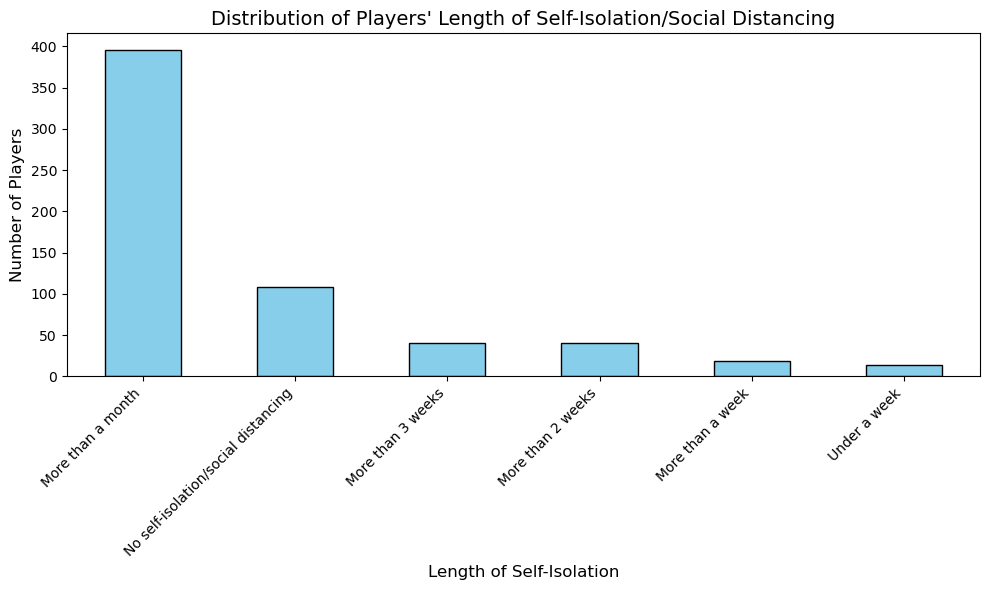

In [20]:
length_counts = data_cleaned['B2'].value_counts()

length_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title("Distribution of Players' Length of Self-Isolation/Social Distancing", fontsize=14)
plt.xlabel("Length of Self-Isolation", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Investigating The distribution of the players' length of being self-isolated/social distancing according to regions

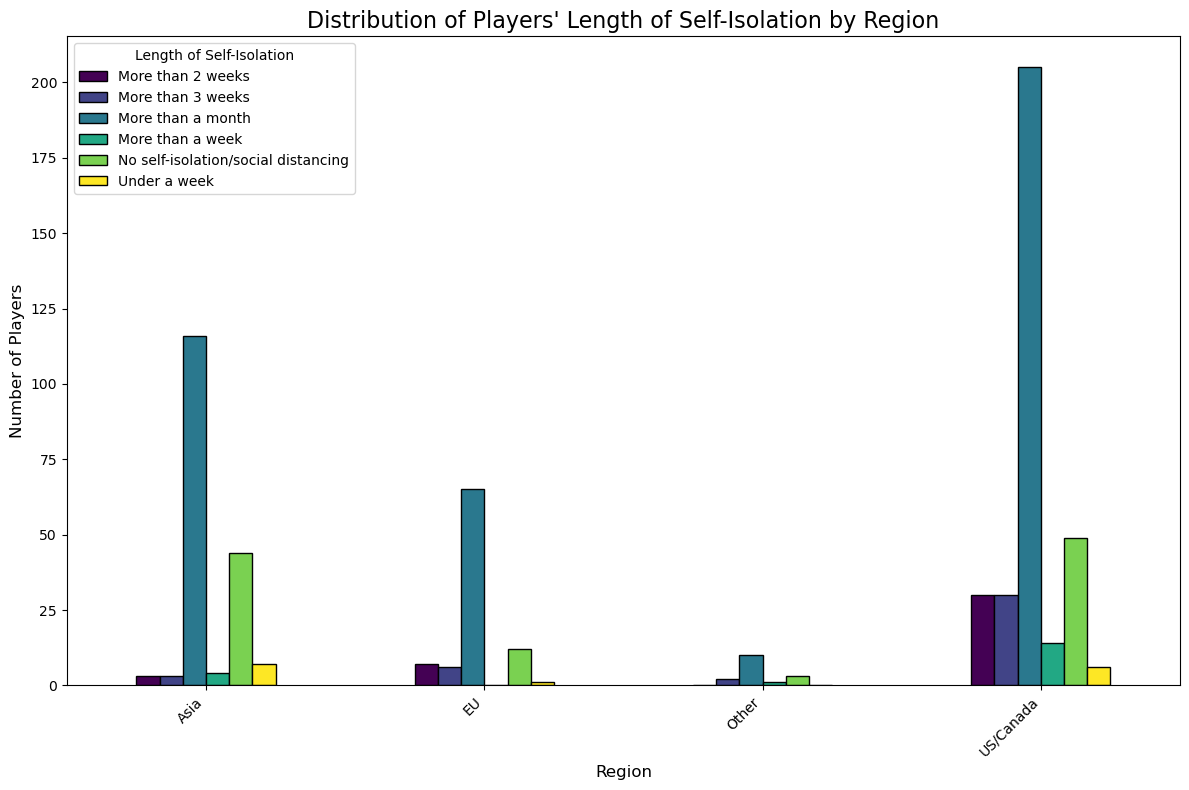

In [21]:
region_length_data = data_cleaned.groupby(['A1_2', 'B2']).size().unstack(fill_value=0)
region_length_data.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title("Distribution of Players' Length of Self-Isolation by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Length of Self-Isolation", loc='upper left')
plt.tight_layout()
plt.show()

## Investigating The relationship between the players' length of being self-isolated/social distancing and the game-playing frequency of the players.

In [22]:
print("D3 - How often do you play computer/video games?")
print(data_cleaned['D3'].value_counts(dropna=False))
print("\nD4 - How many hours on average did you spend playing games a day in the last two weeks?")
print(data_cleaned['D4'].value_counts(dropna=False))
print("\nD5 - How often do you play Animal Crossing?")
print(data_cleaned['D5'].value_counts(dropna=False))

D3 - How often do you play computer/video games?
D3
Everyday                 253
Almost everyday          241
Every week                77
Almost every week         25
Less than every month     13
Every month                9
Name: count, dtype: int64

D4 - How many hours on average did you spend playing games a day in the last two weeks?
D4
3-4 hours                                                                                                219
2-3 hours                                                                                                171
1-2 hours                                                                                                101
20                                                                                                         6
5-6 hours                                                                                                  5
                                                                                                        ... 
20

It seems the answers to 'How often do you play computer/video games?' are all fine. The answers to 'How many hours on average did you spend playing games a day in the last two weeks?' are a mess so i will deal with these and classify the messy answers into more tidy columns. The same applies for 'How often do you play Animal Crossing?'

##### D3 Answers - 'How Often Do You Play Computer/Video Games?'

The value_counts() function does not count the sum of missing (NaN) values  This is fine as we have only identified 1 NaN value above in the D3 column so we will just drop it as it has very littl imoact on the resuts as it is such a low percentage of all entries. 

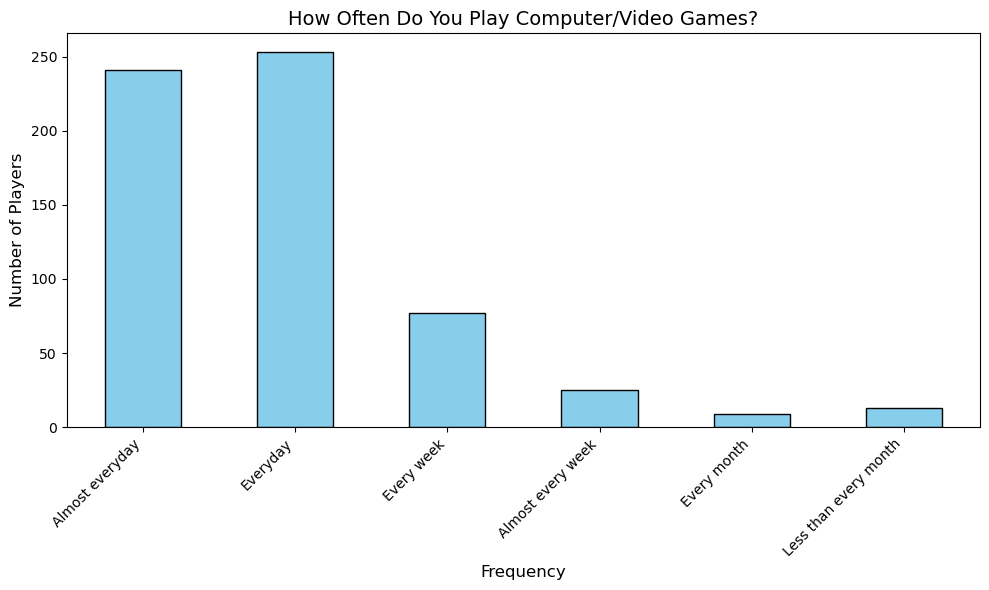

In [23]:
d3_counts = data_cleaned['D3'].value_counts(sort=False)
d3_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("How Often Do You Play Computer/Video Games?", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### D5 Answers - 'How often do you play Animal Crossing?'

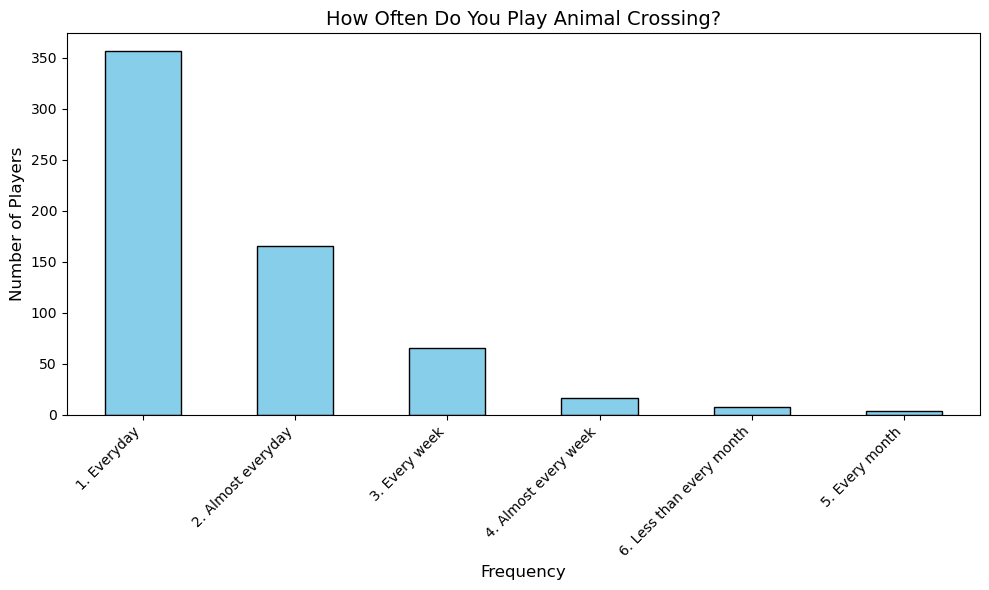

In [24]:
d5_counts = data_cleaned['D5'].value_counts()
filtered_d5_counts = d5_counts[d5_counts > 1]
filtered_d5_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("How Often Do You Play Animal Crossing?", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Investigate the Relationship Between Self-Isolation Length and Game-Playing Frequency

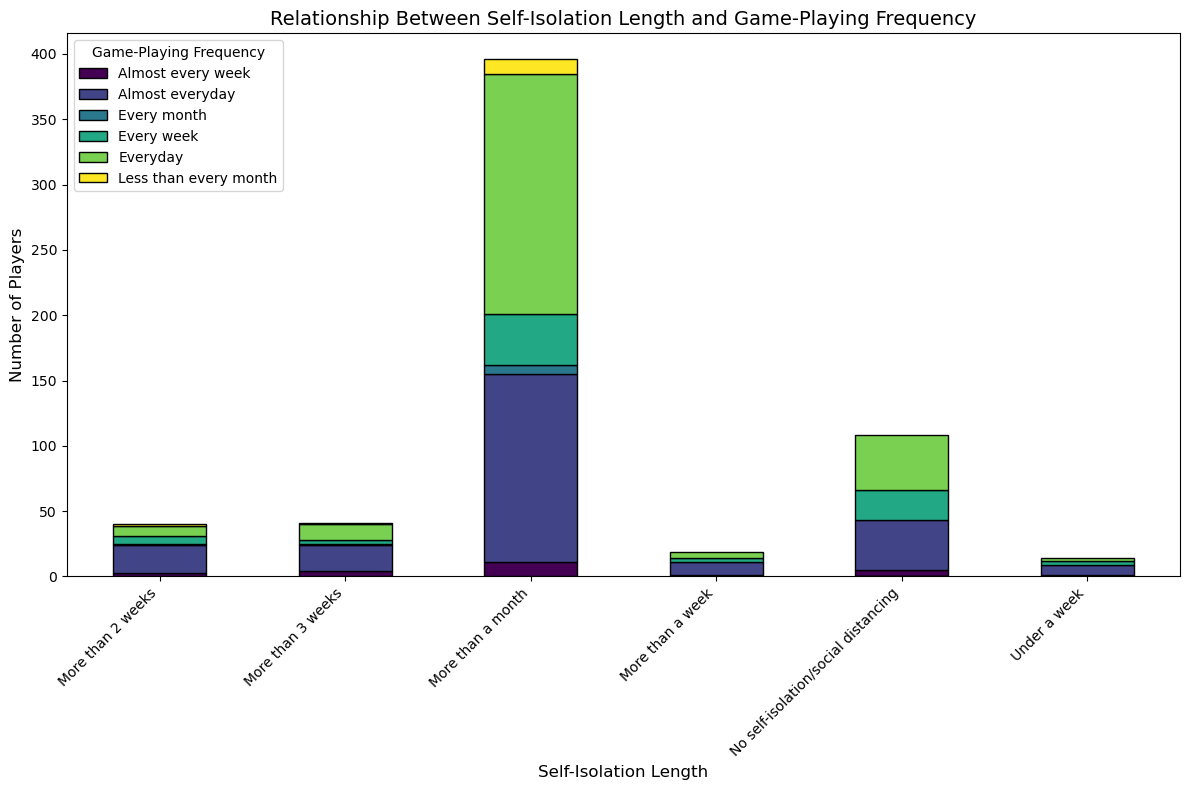

In [25]:
length_frequency_data = data_cleaned.groupby(['B2', 'D3']).size().unstack(fill_value=0)

length_frequency_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black')

plt.title("Relationship Between Self-Isolation Length and Game-Playing Frequency", fontsize=14)
plt.xlabel("Self-Isolation Length", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.legend(title="Game-Playing Frequency", loc='upper left')

plt.tight_layout()
plt.show()

This is quite hard to interpret so i will normalise into percentages. 

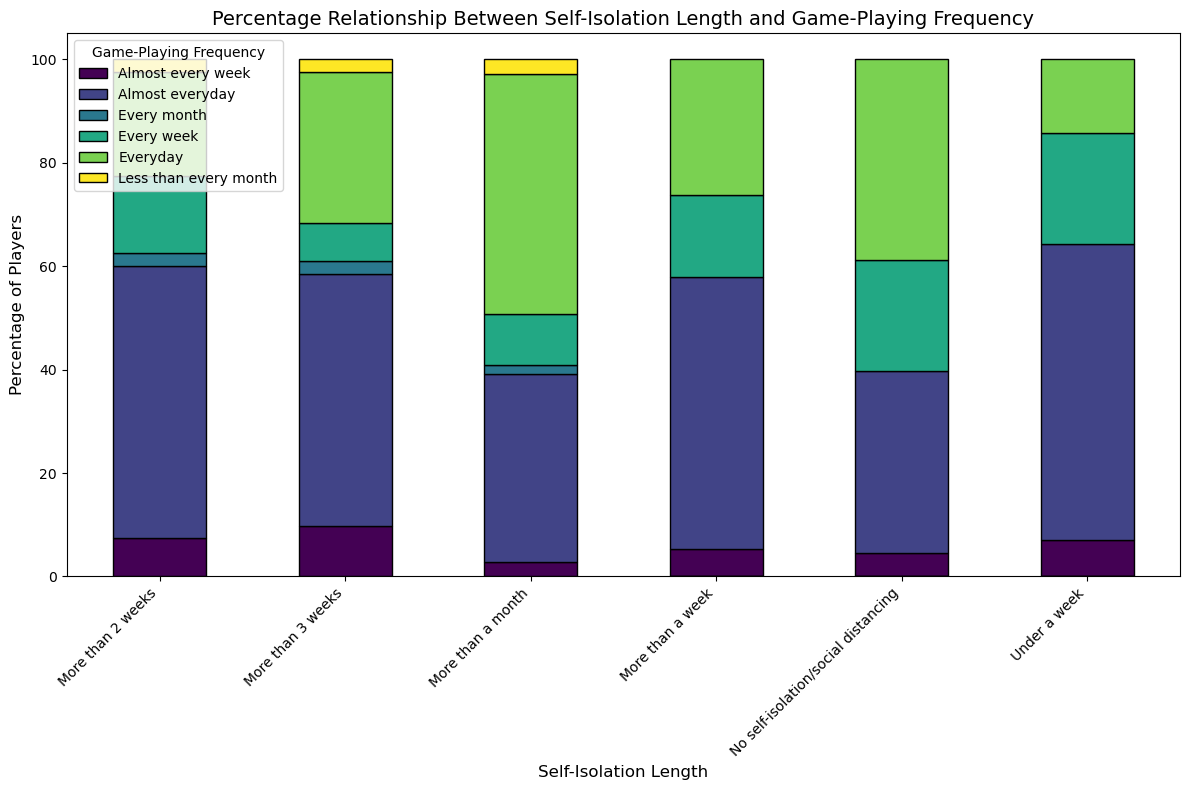

In [26]:
length_frequency_totals = length_frequency_data.sum(axis=1)

length_frequency_data_percentage = length_frequency_data.copy()
for col in length_frequency_data.columns:
    length_frequency_data_percentage[col] = (length_frequency_data[col] / length_frequency_totals) * 100

length_frequency_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black')

plt.title("Percentage Relationship Between Self-Isolation Length and Game-Playing Frequency", fontsize=14)
plt.xlabel("Self-Isolation Length", fontsize=12)
plt.ylabel("Percentage of Players", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.legend(title="Game-Playing Frequency", loc='upper left')

plt.tight_layout()
plt.show()

I am now going to map the different repsonses to numerical variables so that we can carry out correlation analysis. 

In [27]:
frequency_mapping = {
    "Less than every month": 0,
    "Every month": 1,
    "Almost every week": 2,
    "Every week": 3,
    "Almost everyday": 4,
    "Everyday": 5
}

length_mapping = {
    "No self-isolation/social distancing": 0,
    "Under a week": 1,
    "More than a week": 2,
    "More than 2 weeks": 3,
    "More than 3 weeks": 4,
    "More than a month": 5
}

Now i will carry out various methods (graphical and numerical) to investigate whether there is a relationship between self isolation length and game playing frequency.

## Box Plot

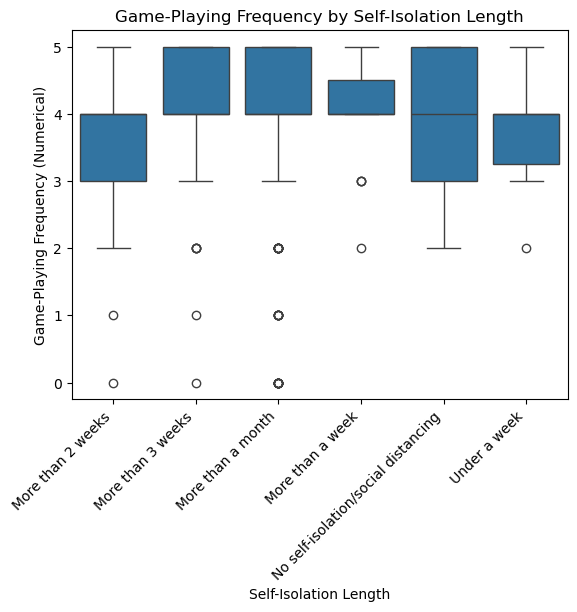

In [28]:
data_cleaned['D3_numeric'] = data_cleaned['D3'].map(frequency_mapping)

sns.boxplot(x='B2', y='D3_numeric', data=data_cleaned, order=length_frequency_data.index)
plt.xticks(rotation=45, ha='right')
plt.title("Game-Playing Frequency by Self-Isolation Length")
plt.xlabel("Self-Isolation Length")
plt.ylabel("Game-Playing Frequency (Numerical)")
plt.show()

## Correlation Matrix

In [29]:
data_cleaned['B2_numeric'] = data_cleaned['B2'].map(length_mapping)

correlation = data_cleaned[['B2_numeric', 'D3_numeric']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
            B2_numeric  D3_numeric
B2_numeric     1.00000     0.04175
D3_numeric     0.04175     1.00000


## Chi-Squared

In [30]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(length_frequency_data)

print("Chi-Square Test of Independence")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between self-isolation length and game-playing frequency.")
else:
    print("There is no statistically significant relationship between self-isolation length and game-playing frequency.")

Chi-Square Test of Independence
Chi2: 42.603939508853514, p-value: 0.015463311281841233, Degrees of Freedom: 25
There is a statistically significant relationship between self-isolation length and game-playing frequency.


## A comparison of the frequency of the different lengths of being self-isolated/social distancing and game-playing feeling response “I lost connection with the outside world”.

In [31]:
mean_responses_lostconnection = data_cleaned.groupby('B2')['F31'].mean()

std_responses_lostconnection = data_cleaned.groupby('B2')['F31'].std()

summary_stats_lostconnection = pd.DataFrame({
    'Mean': mean_responses_lostconnection,
    'Standard Deviation': std_responses_lostconnection
})

print("Mean and Standard Deviation for 'I lost connection with the outside world':")
display(summary_stats_lostconnection)

Mean and Standard Deviation for 'I lost connection with the outside world':


,Mean,Standard Deviation
B2,,
More than 2 weeks,3.475000,1.176424
More than 3 weeks,3.634146,1.134815
More than a month,3.118687,1.342039
More than a week,3.631579,1.011628
No self-isolation/social distancing,2.564815,1.455079
Under a week,3.142857,1.292412


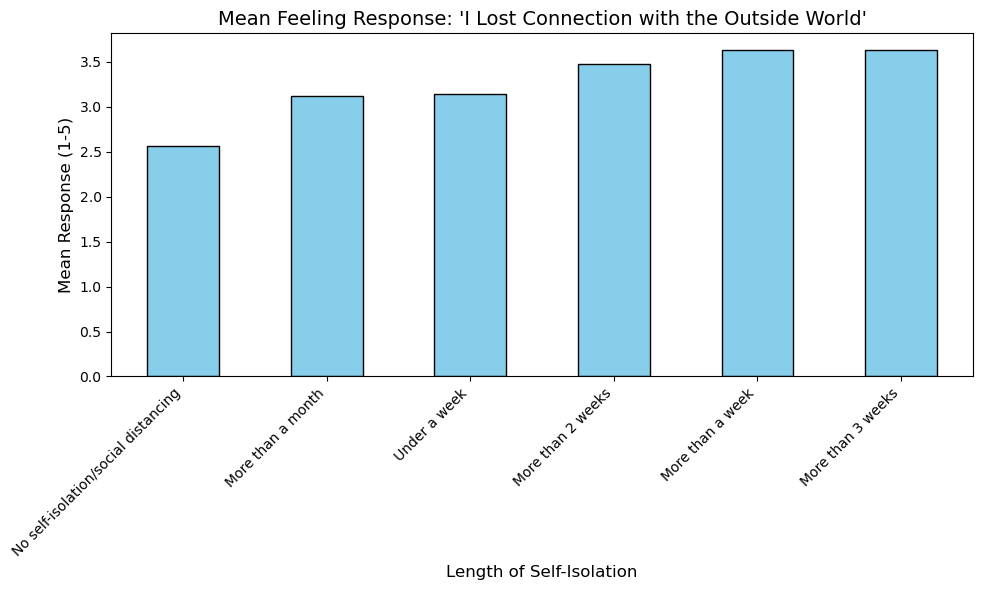

In [32]:
mean_responses_lostconnection_sorted = mean_responses_lostconnection.sort_values(ascending=True)

# Plot the sorted mean responses
mean_responses_lostconnection_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Mean Feeling Response: 'I Lost Connection with the Outside World'", fontsize=14)
plt.xlabel("Length of Self-Isolation", fontsize=12)
plt.ylabel("Mean Response (1-5)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Identify the most important in-game behaviours that indicate the player’s length of being self-isolated/ social distancing.

This section aims to identify the most important in-game behaviours that influence the length of a player’s self-isolation or social distancing. By analysing the relationship between the independent variables and the target variable, this analysis seeks to uncover key behavioural patterns within the game that might predict isolation duration. To achieve this, statistical methods specifically suited for categorical data, including the Chi-Square test and Mutual Information, were employed. These methods provide insights into the strength and significance of associations, enabling the selection of the most relevant features for further modelling and analysis.

## Prepare the Data

To ensure the accuracy of the analysis, a data cleaning step was conducted to identify and address any potential issues with the feature columns. Specifically, the following checks were performed:

- **Null Values**: Each column was inspected for missing data, as null values could impact the results of statistical tests and feature importance analysis.
- **Data Types**: The format of each column was reviewed to confirm compatibility with the Chi-Square and Mutual Information tests, ensuring all features were appropriately treated as categorical or ordinal.
- **Out-of-Scale Values**: Feature columns were checked against their specified scales (1-4 for 24 features and 1-5 for 4 features) to identify any values outside the expected ranges.

In [33]:
in_game_data = data_cleaned.copy(deep=True)

# Just the feature variables
features = in_game_data.loc[:, 'E1':'E28']

# Target variable
target = in_game_data["B2_numeric"]

# Check for null values
null_summary = features.isnull().sum()

# Display columns with null values
null_summary = null_summary[null_summary > 0]
print("Columns with null values:")
print(null_summary)

# Check data types
print("Data types of columns:")
print(features.dtypes)

scale_1_4_columns = ['E1','E2','E3','E4','E5','E10','E11','E12','E13','E14','E15','E16','E17','E18','E19','E20','E21','E22','E23','E24','E25','E26','E27','E28']
scale_1_5_columns = ['E6','E7','E8','E9']

# Check for out-of-range values for 1-4 scale
out_of_range_1_4 = features[scale_1_4_columns][~features[scale_1_4_columns].isin([1, 2, 3, 4]).all(axis=1)]
print("Columns with values outside the 1-4 scale:")
print(out_of_range_1_4)

# Check for out-of-range values for 1-5 scale
out_of_range_1_5 = features[scale_1_5_columns][~features[scale_1_5_columns].isin([1, 2, 3, 4, 5]).all(axis=1)]
print("Columns with values outside the 1-5 scale:")
print(out_of_range_1_5)



Columns with null values:
Series([], dtype: int64)
Data types of columns:
E1     int64
E2     int64
E3     int64
E4     int64
E5     int64
E6     int64
E7     int64
E8     int64
E9     int64
E10    int64
E11    int64
E12    int64
E13    int64
E14    int64
E15    int64
E16    int64
E17    int64
E18    int64
E19    int64
E20    int64
E21    int64
E22    int64
E23    int64
E24    int64
E25    int64
E26    int64
E27    int64
E28    int64
dtype: object
Columns with values outside the 1-4 scale:
Empty DataFrame
Columns: [E1, E2, E3, E4, E5, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22, E23, E24, E25, E26, E27, E28]
Index: []

[0 rows x 24 columns]
Columns with values outside the 1-5 scale:
Empty DataFrame
Columns: [E6, E7, E8, E9]
Index: []




After completing these checks, no discrepancies were identified in the dataset. This confirms that the data is clean and ready for the next steps in the analysis.


## Understand the Data

Before continuing with the analysis, it is important to understand the nature of the feature columns and how this influences the methods used. The features in this dataset are ordinal, meaning their values represent ordered categories with a meaningful progression. This section explains the characteristics of ordinal data, its implications for the analysis, and how it influences the choice of methods.

---

### Characteristics of Ordinal Data

The feature columns in this dataset contain integer values within the ranges 1–4 or 1–5, depending on the feature. These values represent ordinal data, characterised by:

1. **Ordered Categories**:
   - The values have a meaningful order, indicating a progression or ranking (e.g., 1 < 2 < 3 < 4).
   - This order reflects increasing levels or intensities of in-game behaviours.

2. **Fixed Scale**:
   - The ranges are predefined and consistent across the dataset, ensuring interpretability of the ordinal levels.

---

### Implications for Analysis

The ordinal nature of the features has the following implications for the methods used:

1. **Statistical Tests**:
   - Both the Chi-Square test and Mutual Information analysis are appropriate for ordinal data as they are designed to handle both categorical and ordinal variables effectively.
   - The ordinal order ensures that the relationship between the features and the target variable remains meaningful in these tests.

2. **Feature Encoding**:
   - Unlike categorical variables, where one-hot encoding is often used, ordinal data should retain its numeric representation to preserve the order.
   - The natural integer values (1, 2, 3, etc.) are ideal for this type of analysis and subsequent machine learning modelling.

---

### How This Influences the Analysis

- The feature selection methods applied (Chi-Square and Mutual Information) respect the ordinal structure, ensuring that the relationships captured are meaningful and interpretable.
- In later stages of the project, the ordinal nature of the features should guide how they are processed, particularly in model training, where methods like tree-based models (e.g., Random Forest or XGBoost) inherently respect ordinal relationships without requiring explicit encoding.

This understanding ensures that the methods chosen for analysis and modelling are appropriate for the nature of the data, providing robust and interpretable results.


## Analyse the data

### Chi-Squared Tests

#### **Introduction**


---

This section analyses the relationship between the independent variables and the target variable using the Chi-Square test. The Chi-Square test evaluates whether the observed distribution of categories in a variable significantly differs from what would be expected if the variable were independent of the target. 

By calculating the Chi-Square statistic and corresponding p-value for each feature, this analysis identifies variables with statistically significant associations with the target variable. Features with smaller p-values are considered more strongly associated and are prioritised for further analysis.

The results of the Chi-Square tests provide a robust statistical foundation for identifying the most relevant features, forming an essential step in preparing the dataset for subsequent modelling and analysis.


#### **Motivation for Choosing Chi-Square**


---

The Chi-Square test was chosen for this analysis due to its suitability for evaluating relationships between categorical or ordinal variables. Specifically:

1. **Handles Ordinal Data**:
   - The Chi-Square test is designed to assess statistical associations between variables that are categorical or ordinal in nature, making it ideal for this dataset.
   
2. **Measures Statistical Significance**:
   - By providing a p-value for each feature, the test identifies variables that are significantly associated with the target variable, helping to prioritise the most relevant features.

3. **Efficiency for Small Datasets**:
   - The test is computationally lightweight and well-suited for smaller datasets, ensuring robust results without unnecessary complexity.

4. **Foundation for Feature Selection**:
   - The results of the Chi-Square test form a solid statistical foundation for selecting features that will be used in subsequent modelling stages.


#### **Methodology**

---

The Chi-Square test was applied to evaluate the relationship between each feature and the target variable. The following steps were taken:

1. **Contingency Table Construction**:
   - A contingency table was created for each feature, showing the frequency of each category in the feature relative to each class of the target variable.

2. **Chi-Square Test Calculation**:
   - For each contingency table, the Chi-Square statistic, p-value, and degrees of freedom were calculated using the `scipy.stats.chi2_contingency` function.

3. **Significance Threshold**:
   - A significance level of $p < 0.05$ was used to identify features with a strong statistical association with the target variable.

4. **Visualisation**:
   - The results were visualised to highlight:
     - p-values for all features.
     - p-values for significant features only.
     - Chi-Square statistics for significant features.

These steps ensured a robust and systematic analysis of the relationships between features and the target variable.


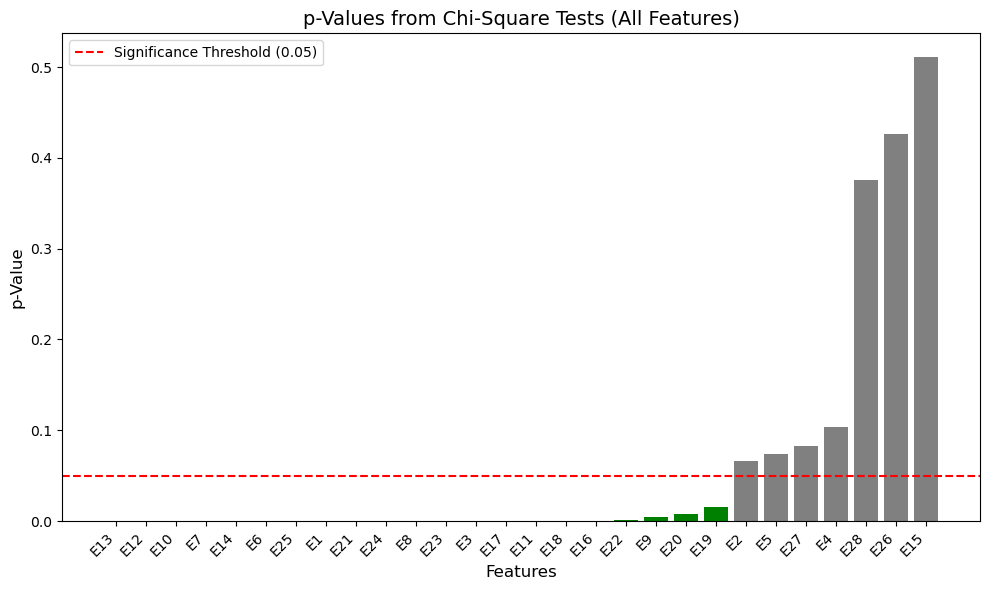

In [34]:
chi2_results = []

# Loop through each feature (exclude the target column)
for column in features:
    # Create a contingency table
    contingency_table = pd.crosstab(features[column], target)
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_results.append({
        'Feature': column,
        'Chi2 Statistic': chi2,
        'p-value': p
    })

# Convert the results into a DataFrame for better readability
chi2_results_df = pd.DataFrame(chi2_results)

# Sort the results by p-value in ascending order
chi2_results_df = chi2_results_df.sort_values(by='p-value')

plt.figure(figsize=(10, 6))
bars = plt.bar(chi2_results_df['Feature'], chi2_results_df['p-value'], color=['green' if p < 0.05 else 'gray' for p in chi2_results_df['p-value']])
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Features', fontsize=12)
plt.ylabel('p-Value', fontsize=12)
plt.title('p-Values from Chi-Square Tests (All Features)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

#### **Graph 1: p-Values for All Features**

---

The first graph visualises the p-values from the Chi-Square test for all features in the dataset. Each bar represents a feature, and the horizontal red dashed line marks the significance threshold $p = 0.05$.

- Features with p-values **below the threshold** (green bars) are considered statistically significant, indicating a strong association with the target variable.
- Features with p-values **above the threshold** (gray bars) are not statistically significant, suggesting little or no relationship with the target.

From the graph, it is evident that only a subset of features exhibit statistical significance. These features will be the focus of further analysis to identify their specific contributions to predicting the player’s length of self-isolation.


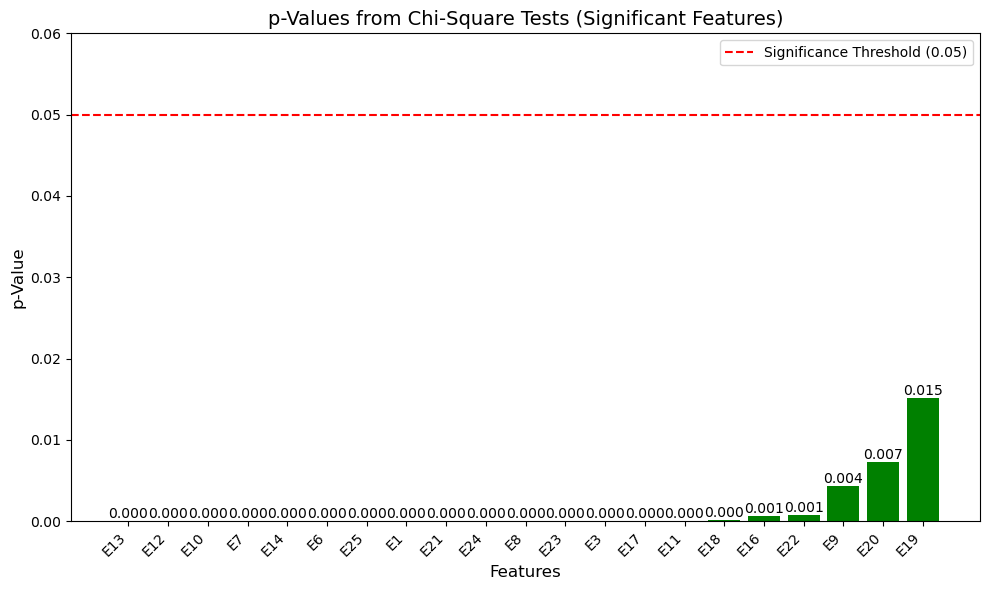

In [35]:
# Filter significant features
significant_features = chi2_results_df[chi2_results_df['p-value'] < 0.05]

plt.figure(figsize=(10, 6))
bars = plt.bar(significant_features['Feature'], significant_features['p-value'], color='green')

# Add labels and title
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Features', fontsize=12)
plt.ylabel('p-Value', fontsize=12)
plt.title('p-Values from Chi-Square Tests (Significant Features)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 0.06)  # Adjust y-axis limit to focus on significant p-values
plt.legend()

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.3f}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


#### **Graph 2: p-Values for Significant Features**

---

This graph focuses on the p-values for features that were identified as statistically significant (\(p < 0.05\)) in the Chi-Square test. While this visualisation highlights these features, many of the p-values are effectively 0 to three decimal places, making further distinctions challenging.

Given this, the analysis transitions to examining the Chi-Square statistics for these significant features in Graph 3, which provides a clearer measure of the strength of their association with the target variable.


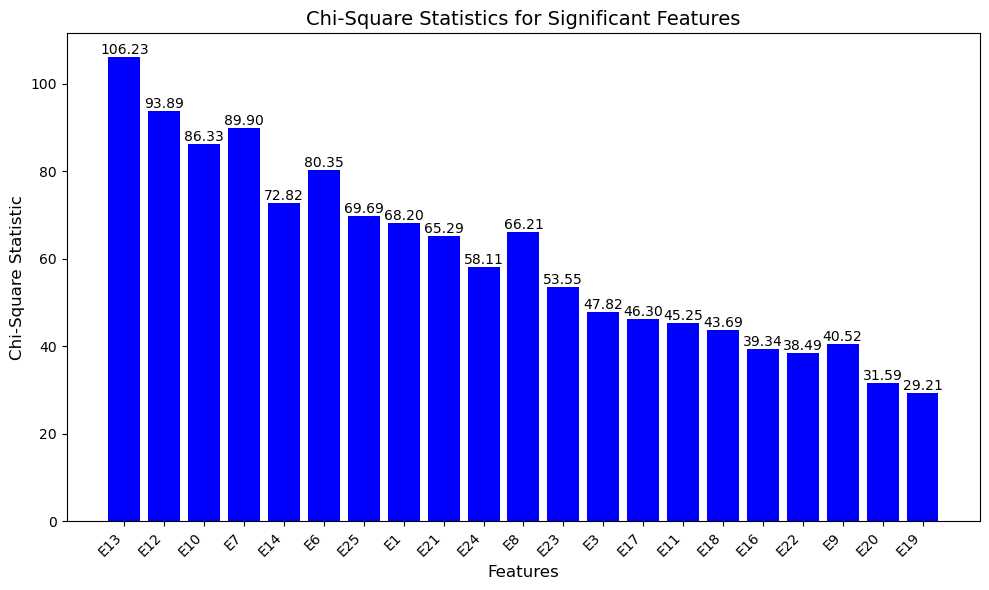

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(significant_features['Feature'], significant_features['Chi2 Statistic'], color='blue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Chi-Square Statistic', fontsize=12)
plt.title('Chi-Square Statistics for Significant Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


#### **Graph 3: Chi-Square Statistic for Significant Features**

---

This graph visualises the Chi-Square statistics for the features identified as statistically significant $p < 0.05$ in the Chi-Square test. Each bar represents the Chi-Square statistic for a significant feature, reflecting the strength of its association with the target variable.

- Features with higher Chi-Square statistics indicate a stronger association with the target variable, making them more relevant for predicting the player’s length of self-isolation.
- The bars are ordered by p-value, meaning that features with the smallest p-values (indicating the strongest statistical significance) are shown on the left. As expected, these features also tend to have the highest Chi-Square statistics.

From the graph, it is clear that features such as **`E13`** and **`E12`** exhibit the highest Chi-Square values, suggesting they play a key role in influencing the target variable. These features will be prioritised in subsequent modelling and analysis.


#### **Key Insights**

---

This analysis highlights the most important features by ranking them based on their Chi-Square statistics and statistical significance. Features with high Chi-Square values and low p-values demonstrate strong associations with the target variable, making them critical for subsequent modelling.

Notably:
- Features **E13** and **E12** exhibit the highest Chi-Square statistics, indicating the strongest relationship with the target variable.
- These features also have the lowest p-values, further confirming their importance.

The results provide a clear basis for prioritising these significant features in feature selection and subsequent model development, ensuring that the strongest predictors of the target variable are identified and utilised.


### Mutual Information Tests

#### **Introduction**

---

This section explores the relationship between the independent variables and the target variable using mutual information. Unlike the Chi-Square test, which evaluates statistical significance, mutual information measures the amount of information one variable provides about another. It captures both linear and non-linear relationships, making it a valuable complement to the Chi-Square analysis.

By calculating the mutual information scores for each feature, this analysis identifies variables that reduce uncertainty about the target variable. Features with higher scores are considered more informative and potentially more impactful for predicting the player’s length of self-isolation.

The results of the mutual information tests will be used to further refine the selection of key features for subsequent modelling and analysis.


#### **Motivation for Using Mutual Information**


---

The mutual information test was chosen for its ability to measure the dependency between variables. Unlike the Chi-Square test, which focuses on statistical significance, mutual information quantifies the amount of information one variable provides about another. This makes it particularly useful for:

1. **Capturing Non-Linear Relationships**:
   - Mutual information detects both linear and non-linear dependencies, offering a broader perspective on feature importance.

2. **Suitability for Ordinal Data**:
   - As with the Chi-Square test, mutual information is well-suited for the ordinal nature of the feature columns, preserving the order and meaning of the data.

3. **Complementing Chi-Square Analysis**:
   - By quantifying information rather than significance, mutual information provides an additional layer of insight into the relationship between features and the target variable.

The combination of Chi-Square and mutual information analyses ensures a comprehensive evaluation of feature importance.


#### **Methodology**

---

The mutual information scores were calculated to quantify the dependency between each feature and the target variable. The following steps were taken:

1. **Preparation**:
   - The feature columns and target variable were prepared to ensure mutual information was calculated on discrete ordinal data.

2. **Score Calculation**:
   - The `mutual_info_classif` function from `scikit-learn` was used to compute mutual information scores for each feature. This method is designed for classification problems and supports discrete features.

3. **Results Ranking**:
   - The scores were ranked in descending order to prioritise the features that provide the most information about the target variable.

These steps ensured that mutual information was accurately computed and that the most informative features were clearly identified.


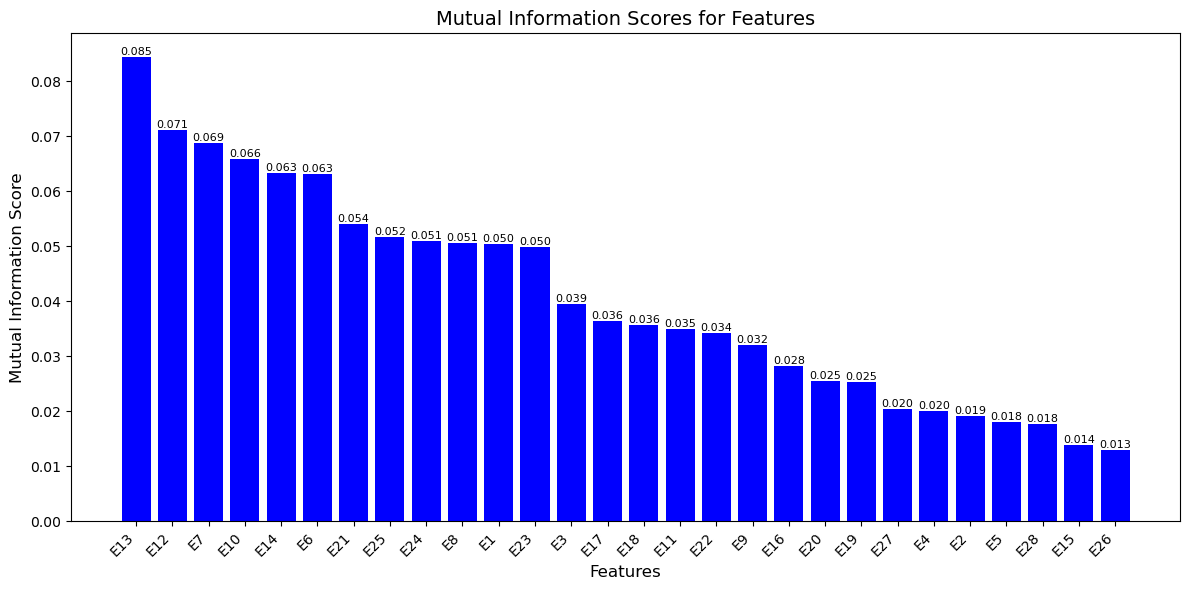

In [37]:

# Compute mutual information scores
mi_scores = mutual_info_classif(features, target, discrete_features=True, random_state=42)

# Create a DataFrame for the results
mi_results_df = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': mi_scores
})

# Sort by Mutual Information score in descending order
mi_results_df = mi_results_df.sort_values(by='Mutual Information', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(mi_results_df['Feature'], mi_results_df['Mutual Information'], color='blue')

# Add labels and title
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mutual Information Score', fontsize=12)
plt.title('Mutual Information Scores for Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate bars with exact scores
for bar, score in zip(bars, mi_results_df['Mutual Information']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.3f}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()




#### **Key Insights**

---

The mutual information analysis highlights the most informative features, providing additional insight into the dataset. Features with higher mutual information scores are more likely to reduce uncertainty about the target variable, making them valuable for predictive modelling.

Notably:
- Features **E13** (0.085) and **E12** (0.071) have the highest mutual information scores, indicating that they provide the most information about the target variable.
- The distribution of scores shows that only a subset of features provides substantial information, while others contribute minimally.

These findings align with the Chi-Square analysis, further reinforcing the importance of features **E13** and **E12**. Together, these analyses form a strong foundation for feature selection and subsequent modelling.


## Reflect on Excluded Methods

In this section, two alternative methods—**Target Encoding** and **Cramér’s V**—are briefly discussed to provide context for their exclusion from the analysis.

### Target Encoding
Target encoding involves replacing each category of a feature with the mean of the target variable for that category. For example, if a feature represents in-game activities (`Low`, `Medium`, `High`), these categories would be replaced by the average length of self-isolation for players in each group.

**Advantages**:
- Provides intuitive insights into how each feature category relates to the target variable.
- Useful for exploring trends and relationships between categories and the target.

**Reason for Exclusion**:
With the target variable being heavily imbalanced (63% in one class), target encoding could skew results and introduce bias. Therefore, statistical tests like the Chi-Square test and Mutual Information were prioritised.

---

### Cramér’s V
Cramér’s V is a normalised measure of association between two categorical variables, derived from the Chi-Square test. It produces a score between 0 and 1, where higher values indicate stronger associations.

**Advantages**:
- Simplifies the interpretation of the Chi-Square test by providing a normalised strength-of-association metric.
- Useful for ranking variables based on their relationship with the target variable.

**Reason for Exclusion**:
Since Cramér’s V is directly derived from the Chi-Square statistic, it does not provide additional insights beyond what the Chi-Square test already offers. To avoid redundancy and maintain a concise analysis, the Chi-Square test was prioritised for its ability to directly assess statistical significance, while Mutual Information was included to capture potential non-linear relationships.

---

### Summary
While both Target Encoding and Cramér’s V are valuable methods, their exclusion from this analysis ensures a focused and streamlined approach, leveraging the most relevant statistical techniques for feature selection in this dataset.


## Conclusion

The data exploration process identified key features that are strongly associated with the target variable, laying the groundwork for effective feature selection and model development. Through Chi-Square and Mutual Information analyses, features such as **E13** and **E12** emerged as consistently important across both statistical significance and informational value.

The inclusion of data cleaning and an understanding of the ordinal nature of the dataset ensured that the methods applied were robust and appropriate. Additionally, a thoughtful evaluation of alternative methods demonstrated a deliberate approach to feature selection.

These findings provide a solid foundation for the next stage of the project, where the identified features will be used to build predictive models and further understand the relationships within the dataset.


# Developing a Machine Learning Model To Predict Players' Length of Being Self-Isolated Based on In-Game Behaviours Only

## Introduction

This section focuses on the development of a machine learning model to predict players' length of self-isolation based solely on their in-game behaviours. The aim is to leverage the features identified in the previous stage to create a robust predictive model.

The analysis will detail the steps taken to define the prediction task, preprocess the data, and evaluate the model's performance. By addressing challenges such as class imbalance and selecting appropriate evaluation metrics, the goal is to ensure the model provides meaningful insights into the relationship between in-game behaviours and self-isolation duration.


## Understanding the Dataset & Task

This section examines the distributions of the feature and target variables in the dataset, providing crucial insights into the structure of the data. By identifying patterns such as class imbalance, skewness, and variability, this analysis highlights potential challenges and informs the preprocessing and modelling decisions.

Building on this understanding, the section defines the overall predictive task, framing the objective of using in-game behaviours to predict the duration of players' self-isolation. By combining exploratory analysis with task definition, this section lays the foundation for a robust and well-informed modelling process.


### Target Variable Distribution

The target variable reflects the length of time players engaged in self-isolation or social distancing, grouped into six distinct categories. The bar chart below illustrates the distribution, revealing a severe class imbalance across the categories.

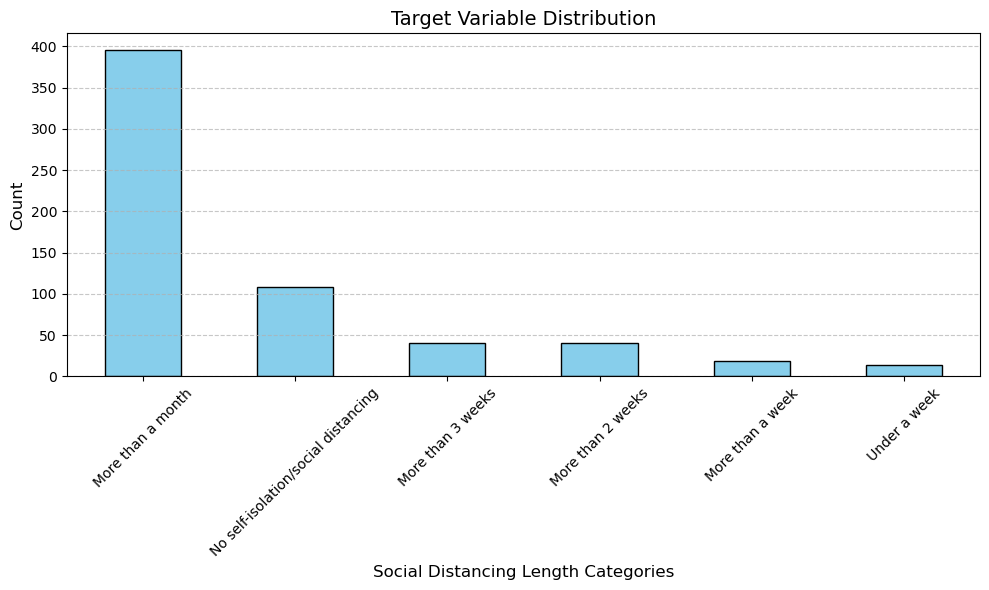

In [38]:
exp_data = data_cleaned.copy(deep=True)
features_exp = exp_data.loc[:, 'E1':'E28']
target_exp = exp_data["B2"]
response_counts_target = target_exp.value_counts()
plt.figure(figsize=(10, 6))
response_counts_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Variable Distribution', fontsize=14)
plt.xlabel('Social Distancing Length Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Class-by-Class Analysis**

---

1. **`More than a month` (396 instances, ~63%)**:
   - The dominant class, comprising the majority of players.
   - While its large size ensures reliable predictions, it risks biasing the model to overpredict this category at the expense of smaller classes.

2. **`No self-isolation/social distancing` (108 instances, ~17%)**:
   - The second-largest class, representing players who did not engage in self-isolation.
   - Its size is significant but notably smaller than the dominant class, making it vulnerable to being overshadowed during modelling.

3. **`Less than a week` (14 instances, ~2%)**:
   - The smallest and most underrepresented class.
   - Its scarcity presents a challenge for accurate prediction, necessitating oversampling, class weighting, or other balancing techniques.

4. **`More than a week` (19 instances, ~3%)**:
   - A similarly underrepresented class, with few instances.
   - Requires balancing strategies to ensure it is adequately represented during training.

5. **`More than two weeks` (40 instances, ~6%)**:
   - Represents medium-length isolation periods but remains relatively small compared to the dominant class.

6. **`More than three weeks` (41 instances, ~7%)**:
   - Slightly larger than `More than two weeks` but still underrepresented compared to the dominant class.


#### **Implications for Modelling**

---

1. **Class Imbalance Challenges**:
   - The extreme imbalance between the dominant class (`More than a month`) and the smaller classes (e.g., `Less than a week` and `More than a week`) necessitates strategies to address imbalance. Potential solutions include:
     - **Oversampling**: Augmenting instances of minority classes.
     - **Class Weighting**: Adjusting the loss function to penalise misclassification of smaller classes more heavily.
     - **Undersampling**: Reducing instances of the dominant class to balance the dataset.

2. **Evaluation Metrics**:
   - Relying solely on overall accuracy would likely result in a model biased toward predicting the majority class.
   - Metrics such as **F1-score**, **precision**, and **recall** for each class should be prioritised to ensure fair evaluation across all categories.

3. **Model Choice**:
   - Models such as **XGBoost** or **Random Forest** are well-suited for handling imbalanced datasets.
   - Gradient Boosting models can incorporate class weighting directly, making them robust to imbalance. Random Forests may require additional tuning to address imbalance effectively.

### Feature Variables Investigation

#### **Introduction**

---

This section examines the distributions of the independent variables, which are represented on 1-4 and 1-5 scales. Understanding these distributions provides valuable insights into the variability and balance of player behaviours captured in the dataset. 

The analysis highlights patterns such as skewness, balance, and variability across response categories, which are crucial for identifying features that may contribute meaningfully to predictive modelling. Additionally, the findings will guide preprocessing and feature selection, ensuring that the machine learning model is built on a solid foundation.


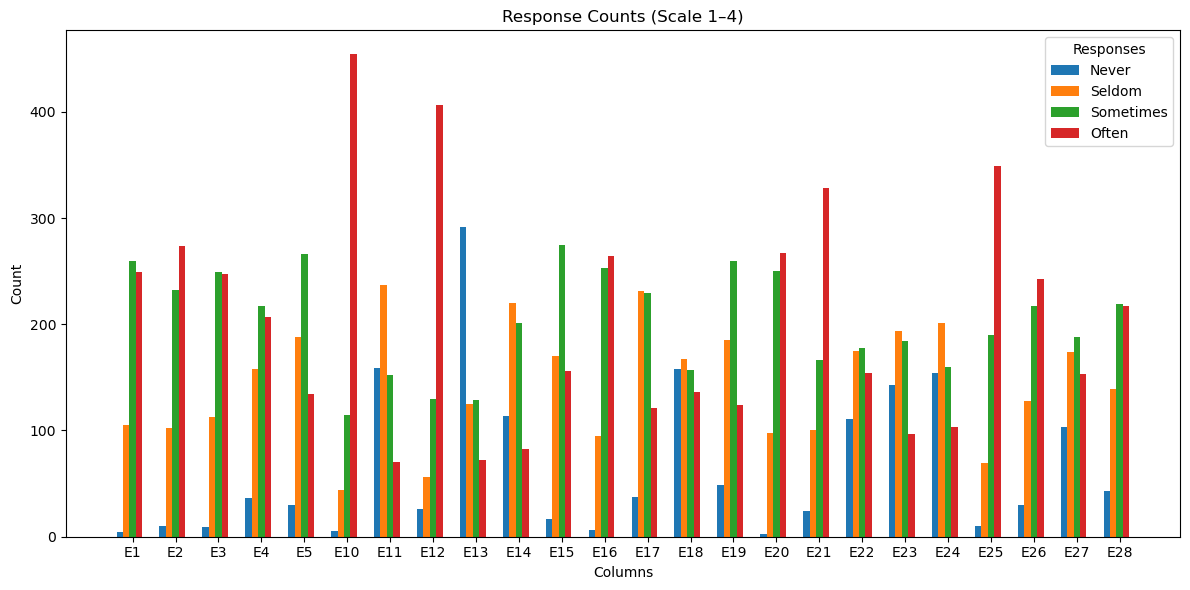

In [39]:
# Response labels for each scale
scale_1_4_labels = {1: 'Never', 2: 'Seldom', 3: 'Sometimes', 4: 'Often'}
scale_1_5_labels = {1: 'Very Unlikely', 2: 'Unlikely', 3: 'Maybe', 4: 'Likely', 5: 'Very Likely'}

# Function to plot bar charts for a group of columns
def plot_bar_chart(df, columns, title, scale_range, labels):
    counts = {val: [] for val in range(scale_range[0], scale_range[1] + 1)}

    for col in columns:
        col_counts = df[col].value_counts().sort_index()
        for val in range(scale_range[0], scale_range[1] + 1):
            counts[val].append(col_counts.get(val, 0))  # Add 0 if the value is missing

    # Create a grouped bar chart
    x = range(len(columns))
    bar_width = 0.15

    plt.figure(figsize=(12, 6))
    for i, val in enumerate(counts.keys()):
        plt.bar([pos + i * bar_width for pos in x], counts[val], bar_width, label=labels[val])
    
    plt.xticks([pos + bar_width * (len(counts) // 2) for pos in x], columns, rotation=0)
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.legend(title='Responses')
    plt.tight_layout()
    plt.show()

# Plot for 1-4 scale
plot_bar_chart(features, scale_1_4_columns, 'Response Counts (Scale 1–4)', (1, 4), scale_1_4_labels)


#### **Distribution of Independent Variables Represented by a (1-4) Scale**

---

The distribution of responses to variables on a 1-4 scale ("Never," "Seldom," "Sometimes," "Often") varies significantly:

- **Skewed Variables**:
  - Variables such as **E10, E12, E21, and E25** are dominated by the "Often" category, suggesting these behaviours are nearly universal. Skewed distributions may contribute less unique information to the predictive model.

- **Balanced Variables**:
  - Variables like **E18, E22, E23, and E24** exhibit more balanced distributions, capturing a broader range of player behaviours. Despite this, their relatively low correlation with the target variable in Chi-Square and Mutual Information tests suggests they may not strongly influence predictions. Their utility will depend on how well they interact with other features in the model.

- **Key Contributor: E13**:
  - The "Never" category dominates **E13**, setting it apart from other variables. This variable (`How often do you do the following activities with fish or bugs? [Send it to a friend as a gift]`) is hypothesised to be associated with longer self-isolation durations, making it a key feature for modelling.



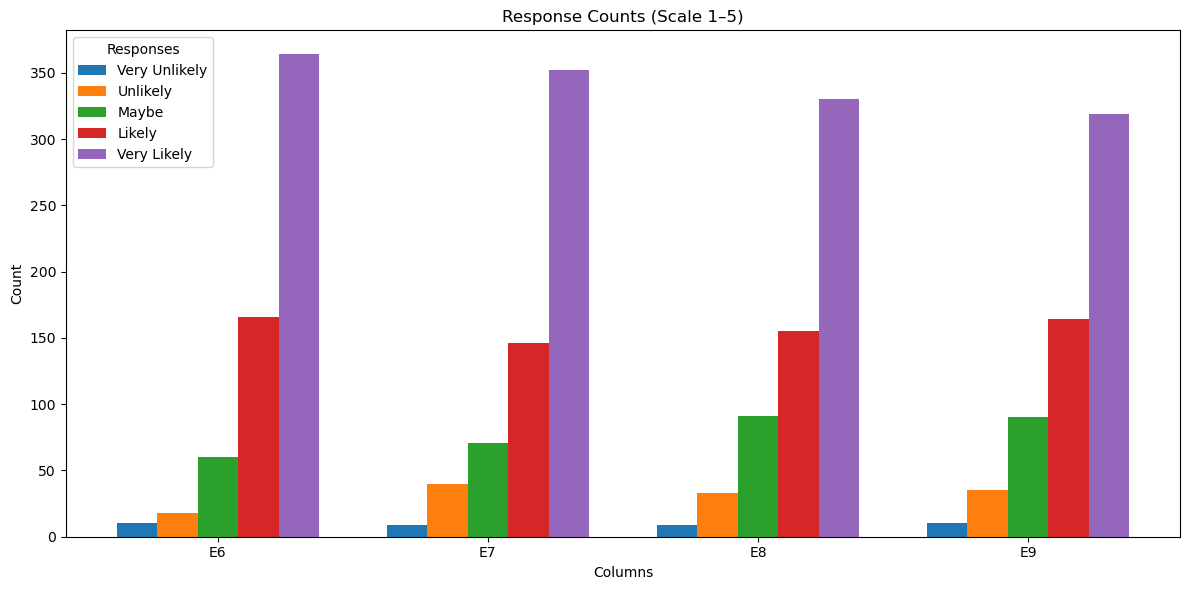

In [40]:
# Plot for 1-5 scale
plot_bar_chart(features, scale_1_5_columns, 'Response Counts (Scale 1–5)', (1, 5), scale_1_5_labels)

#### **Distribution of Independent Variables Represented by a (1-5) Scale**

---

The second graph visualises the distribution of responses to independent variable questions measured on a 1-5 scale ("Very Unlikely," "Unlikely," "Maybe," "Likely," "Very Likely"). Key observations include:

- **Dominance of "Very Likely"**:
  - For all variables displayed (**E6, E7, E8, E9**), the "Very Likely" category (Purple) is the most frequent. This dominance indicates that most players perceive these behaviours as highly likely, resulting in limited variability. Despite this skewness, these variables exhibit strong correlations with the target variable, suggesting they hold predictive value.

- **Mid-Scale Responses**:
  - Mid-scale responses, such as "Maybe" (Green) and "Likely" (Red), are present for variables like **E7, E8, and E9** but are considerably less frequent than "Very Likely." While this suggests some potential for differentiation among players, the limited representation of mid-scale responses reduces overall balance and variability.


#### **Implications for Modelling**

---

The analysis of feature variable distributions highlights several key considerations for modelling:

1. **Skewed Variables**:
   - Variables dominated by specific categories (e.g., "Often" or "Very Likely") may offer limited unique information unless they strongly correlate with the target variable. For instance, variables like **E6, E7, E8, and E9** exhibit strong correlations despite their skewed distributions, making them important for prediction.

2. **Balanced Variables**:
   - Balanced distributions (e.g., **E18 and E22**) capture a wider range of behaviours but showed weaker correlations with the target variable. These variables may still provide utility in interactions with other features.

3. **Key Contributors**:
   - Unique variables like **E13**, hypothesised to relate to longer self-isolation periods, should be closely monitored during feature selection and modelling to validate their importance.

This analysis will guide feature selection, preprocessing strategies, and the development of a robust predictive model.



### Conclusion

The analysis of both the target and feature variable distributions provided critical insights into the dataset's structure and the challenges it presents for modelling. Key findings include:

- **Target Variable**: A severe class imbalance was identified, with the majority class ("More than a month") dominating the dataset. This imbalance highlights the need for strategies like class weighting and careful metric selection to ensure fair evaluation and robust predictions across all classes.

- **Feature Variables**: The analysis revealed a mix of skewed and balanced distributions among the independent variables. Skewed variables, such as **E6, E7, E8, and E9**, demonstrated strong correlations with the target variable despite limited variability, while balanced variables like **E18 and E22** offer potential through their broader range of responses. Additionally, unique variables like **E13** emerged as key contributors aligned with the project hypothesis.

These findings lay a strong foundation for the preprocessing and modelling stages, ensuring that the dataset's characteristics are fully understood and leveraged to develop a robust predictive model.


### Defining the Predictive Task

The goal of this machine learning task is to predict the duration of self-isolation for players based on their in-game behaviours. This is framed as a **multiclass classification problem**, where the target variable represents six distinct classes corresponding to different durations of self-isolation.

#### Target Variable
- The target variable contains six classes, with each class representing a different range of self-isolation durations.
- The classes are heavily imbalanced, with approximately 63% of the data concentrated in a single class. This imbalance poses a challenge for both model performance and evaluation.

#### Features
- The independent variables consist of 28 ordinal features identified during the data exploration stage, with values on a 1–4 or 1–5 scale.
- These features represent various in-game behaviours, which are expected to correlate with players' self-isolation durations.

#### Task Overview
The aim is to train a model that can accurately classify players into one of the six duration categories based on these features. The model's success will be evaluated based on its ability to handle class imbalance and provide meaningful predictions across all target classes.


## Chosen Model & Methodology

### Introduction

This section outlines the process of selecting the most suitable machine learning model for predicting players' length of self-isolation. It begins by evaluating various potential models, highlighting why certain approaches were deemed unsuitable for this task. The chosen model is then presented, along with the motivations for its selection, focusing on its alignment with the dataset's characteristics and the project’s objectives.


### Unsuitable Models

Several models were evaluated and deemed unsuitable for this task due to limitations in handling ordinal data, class imbalance, or small datasets:

1. **Logistic Regression**:
   - Assumes linear relationships, which are unlikely given the weak correlations between features and the target variable.
   - Struggles with multiclass classification and imbalanced datasets without extensive preprocessing.

2. **Support Vector Classifier (SVC)**:
   - Relies on hyperplanes, which are biased toward majority classes in imbalanced datasets.
   - Computationally expensive for multiclass tasks, particularly with a small dataset.

3. **Naïve Bayes**:
   - Assumes feature independence, which is unrealistic for this dataset.
   - Does not address class imbalance, leading to biased predictions toward the majority class.

4. **k-Nearest Neighbours (k-NN)**:
   - Requires meaningful distance metrics, which are difficult to define for ordinal features.
   - Predictions are biased toward the majority class in imbalanced datasets.

5. **Decision Trees**:
   - While capable of handling ordinal data and non-linear relationships, decision trees are prone to overfitting on small datasets without additional regularisation.

6. **Neural Networks**:
   - Overly complex for a small dataset and prone to overfitting.
   - Requires significant computational resources and preprocessing.

7. **Linear Discriminant Analysis (LDA)**:
   - Assumes the features follow a multivariate normal distribution, which is inappropriate for categorical data.
   - Additionally, its decision boundaries are heavily influenced by the majority class, making it unsuitable for imbalanced datasets like ours.

8. **XGBoost**:
   - While XGBoost is robust for small datasets and handles non-linear relationships effectively, its inability to use `scale_pos_weight` for multiclass classification limits its ability to address class imbalance directly.
   - This reliance on indirect methods (e.g., stratified sampling) for imbalance management reduces its suitability for this task.

9. **LightGBM**:
   - Although LightGBM supports `class_weight`, it is highly sensitive to hyperparameter tuning, making it challenging to stabilise with a small dataset.
   - Additionally, its focus on computational efficiency over model interpretability makes it less ideal for this project, where understanding feature importance is key.


These limitations underscore the need for a robust model capable of addressing these challenges effectively.



### Chosen Model

After evaluating various approaches, **Random Forests** was selected as the most suitable model for this task.

- **Why Random Forests?**
  1. **Handling Ordinal Data**:
     - Random Forests can effectively handle ordinal features without requiring complex preprocessing, preserving the natural order of the data.
  2. **Class Imbalance**:
     - The `class_weight` parameter directly addresses class imbalance by weighting underrepresented classes during training, ensuring fair representation across all target categories.
  3. **Small Dataset**:
     - Random Forests are robust to overfitting, even on small datasets, due to their ensemble nature and built-in randomness during training.
  4. **Captures Non-Linear Relationships**:
     - By averaging predictions across multiple decision trees, Random Forests are capable of capturing complex, non-linear relationships in the data.

This combination of simplicity, robustness, and flexibility makes Random Forests an excellent choice for the dataset and task at hand.


### Methodology

The chosen Random Forests model will be implemented using a structured approach to ensure robust and accurate predictions. The methodology includes the following steps:

1. **Data Preprocessing**:
   - The dataset will be prepared by addressing class imbalance, splitting the data into training, validation, and test sets, and ensuring that ordinal features are appropriately represented.

2. **Model Training**:
   - The model will be trained on the processed dataset using stratified splits to preserve the target variable's class proportions.

3. **Model Optimisation**:
   - Hyperparameter tuning will be performed to optimise the model’s performance and balance underfitting and overfitting.

4. **Performance Evaluation**:
   - The model will be evaluated using metrics such as F1-score, precision, and recall, with particular attention to the performance on underrepresented classes.

By following this structured methodology, the project aims to develop a robust predictive model that accurately forecasts players' length of self-isolation based on their in-game behaviours.


## Data Preprocessing

### Introduction

This section details the steps taken to prepare the dataset for modelling, ensuring that the chosen XGBoost model is provided with clean and well-structured data. With data cleaning already completed, the focus will shift to addressing class imbalance through stratified sampling, creating balanced training, validation, and test splits that preserve the distribution of the target variable. These preprocessing steps are critical for building a robust and fair predictive model.


### Splitting the Data

To address the class imbalance in the target variable, stratified sampling was used during the data splitting process. This ensures that the class proportions of the target variable are preserved across the training, validation, and test sets, providing a balanced and representative distribution for model training and evaluation.

#### **Why Stratified Splitting?**
1. **Preserves Class Proportions**:
   - Ensures that underrepresented classes are included in all subsets, preventing their exclusion or overrepresentation.
   
2. **Enables Reliable Validation and Testing**:
   - Balanced validation and test sets allow for robust hyperparameter tuning and unbiased performance evaluation.

3. **Improves Generalisation**:
   - The model is exposed to all classes during training, reducing bias towards the majority class.

#### **How It Works**
1. **Initial Split**:
   - The dataset is divided into a training set (80% of the data) and a temporary set (20%), with class proportions preserved using stratified sampling.

2. **Validation-Test Split**:
   - The temporary set is further split into validation (10%) and test (10%) sets, again using stratified sampling to maintain class balance.

This process ensures that all subsets mirror the original target variable distribution, which is critical for building a robust and fair predictive model.


In [41]:
model_data = data_cleaned.copy(deep=True)

# Just the feature variables
features = model_data.loc[:, 'E1':'E28']

# Target variable
target = model_data["B2_numeric"]

xtrain, xtemp, ytrain, ytemp = train_test_split(features, target, stratify=target, test_size=0.2, random_state=42)

xtest, xval, ytest, yval = train_test_split(xtemp, ytemp, stratify=ytemp, test_size = 0.5, random_state=42)

### Feature Selection

Insights from the earlier analysis, such as Chi-Square and Mutual Information tests, highlighted several features as potentially important for predicting the target variable. These key features will be prioritised during model training and evaluation to ensure the model focuses on the most relevant aspects of the dataset. The final feature set will be confirmed during the optimisation phase to validate their contribution to model performance.


## Model Training & Optimisation

### Introduction

This section details the process of training the chosen Random Forests model and optimising its performance for the predictive task. The training phase focuses on fitting the model to the training data while addressing the challenges posed by class imbalance and the dataset's ordinal features. The optimisation phase involves hyperparameter tuning and cross-validation to enhance the model’s accuracy, generalisability, and fairness across all target classes.

By iteratively refining the model and validating its performance, this section aims to establish a robust framework for making accurate predictions based on players' in-game behaviours.


### Hyperparameter Tuning: Explanation and Motivation

#### **Overview**

---


Hyperparameter tuning is a critical step in optimising the Random Forest model to ensure its performance is maximised for the predictive task. By systematically searching for the best combination of parameters, this process balances underfitting and overfitting, addressing the dataset's challenges, including class imbalance and a small size.

#### **Parameters and Their Roles**

---


1. **`n_estimators`**:
   - Represents the number of trees in the forest.
   - A higher number of trees increases the model's robustness but also raises computational costs.

2. **`max_depth`**:
   - Specifies the maximum depth of each tree.
   - Controls the complexity of the model:
     - Smaller values reduce overfitting but may underfit the data.
     - Larger values allow the model to capture complex patterns but risk overfitting.

3. **`min_samples_split`**:
   - The minimum number of samples required to split a node.
   - Higher values limit tree growth and reduce overfitting.

4. **`min_samples_leaf`**:
   - The minimum number of samples required to form a leaf node.
   - Larger values create simpler trees, reducing the risk of overfitting.

5. **`class_weight`**:
   - Balances the model’s focus on underrepresented classes by assigning higher weights to minority classes.
   - Automatically adjusts class weights when set to `"balanced"`.

6. **`max_features`**:
   - The maximum number of features considered when splitting a node.
   - Lower values increase diversity among trees, reducing overfitting.



#### **Scoring Metric: F1-Score**

---


- **Why F1-Score?**
  - The dataset is heavily imbalanced, with one class dominating the target variable.
  - F1-score balances precision and recall, making it more suitable than overall accuracy for evaluating performance on minority classes.
  - The **weighted F1-score** ensures that performance is evaluated proportionally across all classes, reflecting the importance of each class's contribution.
 
#### **Hyperparameter Search**


---

Hyperparameter tuning is a critical step in optimising the Random Forest model. Two common approaches are **Grid Search** and **Randomised Search**:

1. **Grid Search**:
   - **How it works**: Systematically evaluates all possible combinations of specified hyperparameters within defined ranges.
   - **Advantages**:
     - Exhaustive search ensures the optimal combination of hyperparameters is identified.
   - **Disadvantages**:
     - Computationally expensive, especially for large datasets or wide parameter ranges.
     - For this project, the combination of a small dataset and large parameter space made Grid Search infeasible due to its high computational cost.

2. **Randomised Search**:
   - **How it works**: Randomly samples a fixed number of hyperparameter combinations from the specified ranges.
   - **Advantages**:
     - Significantly reduces computational cost by focusing on a subset of the parameter space.
     - Allows for exploring a broader range of values with fewer iterations.
     - Suitable for small datasets where computational efficiency is important.
   - **Disadvantages**:
     - Does not guarantee the absolute best combination of parameters but often identifies near-optimal configurations.

**Why Randomised Search for This Project?**
- Due to the small dataset size (628 rows) and the need to tune multiple hyperparameters, Grid Search was computationally taxing and impractical.
- Randomised Search offers a balance between computational efficiency and performance, making it the preferred approach for this task.

This method enables the model to explore the parameter space efficiently, focusing on combinations that are likely to yield strong results without exhausting computational resources.


#### **Why These Choices Matter**

---


- Tuning these parameters ensures that the Random Forest model is both accurate and generalisable, addressing the specific challenges of the dataset.
- Using F1-score as the scoring metric prioritises fair evaluation across all classes, avoiding bias introduced by the dataset's class imbalance.


### Hyperparameter Tuning

In [42]:
# Define explicit parameter ranges for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [3, 5, 10, 15, 20],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],       # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 5, 10, 15],         # Minimum number of samples in a leaf
    'max_features': ['sqrt', 'log2', None],        # Number of features to consider at each split
    'class_weight': ['balanced', 'balanced_subsample']  # Class weighting
}

# Instantiate Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomised Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=200,                  # Number of parameter combinations to try
    scoring='f1_weighted',      # Scoring metric
    cv=5,                       # Stratified k-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit randomised search
#random_search.fit(xtrain, ytrain)

# Get the best parameters
#print("Best Parameters:", random_search.best_params_)

### Conclusion

The **Model Training and Optimisation** process successfully identified the optimal hyperparameters for the Random Forest model, balancing performance and computational efficiency. After conducting a Randomised Search over a carefully defined parameter space, the following configuration was selected:

- **Optimal Parameters**:
  - `n_estimators`: 50
  - `min_samples_split`: 10
  - `min_samples_leaf`: 2
  - `max_features`: `'sqrt'`
  - `max_depth`: 15
  - `class_weight`: `'balanced'`

These parameters reflect a model configuration that is both robust and generalisable, addressing key challenges posed by the dataset, such as class imbalance and potential overfitting. The choice of `class_weight='balanced'` ensures that underrepresented classes are adequately considered during training, while parameters like `max_features='sqrt'` and `min_samples_leaf=2` strike a balance between model complexity and computational cost.

This optimised model will serve as the foundation for evaluating performance in the subsequent section, where its ability to predict players' self-isolation durations based on in-game behaviours will be assessed.


### Evaluation on the Validation Set

After completing hyperparameter tuning using Randomised Search, the validation set is used as an additional step to confirm the model's generalisation ability. While the hyperparameters were optimised using cross-validation on the training set, evaluating the model on a separate validation set provides an unbiased assessment of its performance before testing on the final test set.

**Why Use the Validation Set?**
- **Generalisation Check**: Ensures the model has not overfitted to the training data during hyperparameter tuning.
- **Pre-Test Evaluation**: Acts as an intermediate checkpoint to validate the model's readiness for final evaluation on the test set.
- **Class Imbalance Assessment**: Provides insights into how the model handles minority classes on unseen data.

**Process Overview**:
1. The optimised Random Forest model is evaluated on the validation set using the weighted F1-score, which accounts for the dataset's class imbalance.
2. Precision, recall, and other metrics are also be calculated for detailed performance analysis.

This step ensures that the selected hyperparameters and the resulting model configuration generalise well to unseen data, reducing the risk of overfitting and improving confidence in the final evaluation results.


Validation Metrics:
F1 Score (Weighted): 0.6344
Precision (Weighted): 0.6318
Recall (Weighted): 0.6613
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         2
           3       0.50      0.50      0.50         4
           4       0.00      0.00      0.00         4
           5       0.76      0.90      0.82        39

    accuracy                           0.66        62
   macro avg       0.46      0.36      0.39        62
weighted avg       0.63      0.66      0.63        62



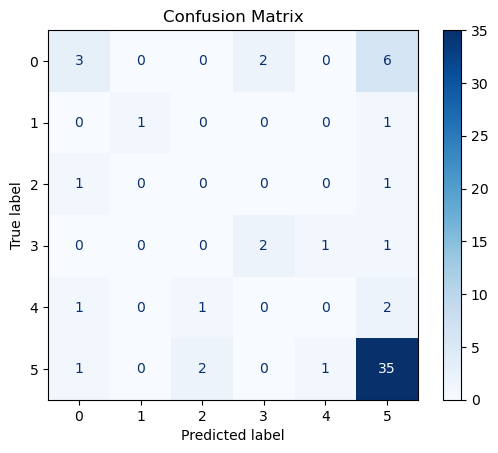

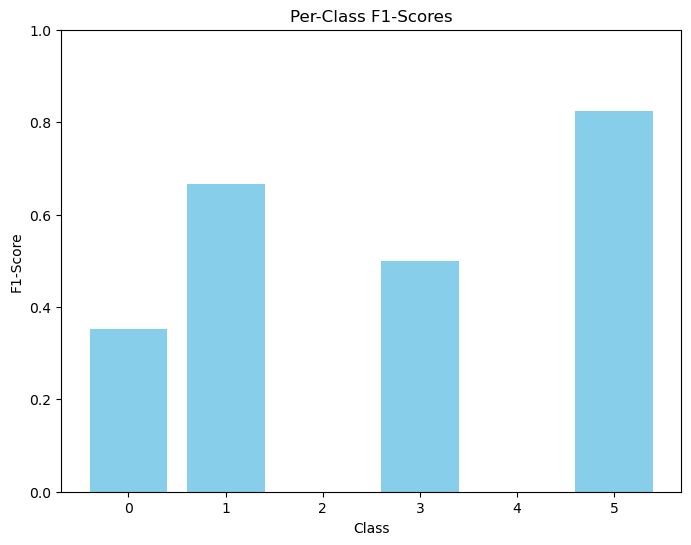

In [43]:
# Use the best model from Randomised Search
optimised_model = RandomForestClassifier(n_estimators=50,
                                         min_samples_split=10,
                                         min_samples_leaf=2,
                                         max_features='sqrt',
                                         max_depth=15,
                                         class_weight='balanced',
                                         random_state=42)

optimised_model.fit(xtrain,ytrain)

# Make predictions on the validation set
yval_pred = optimised_model.predict(xval)

# Calculate evaluation metrics
f1 = f1_score(yval, yval_pred, average='weighted')
precision = precision_score(yval, yval_pred, average='weighted')
recall = recall_score(yval, yval_pred, average='weighted')

# Print metrics
print("Validation Metrics:")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Classification Report
# Generate the classification report as a dictionary
report = classification_report(yval, yval_pred, output_dict=True)
report_print = classification_report(yval, yval_pred)
print(report_print)

# Confusion Matrix
cm = confusion_matrix(yval, yval_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimised_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Extract F1-scores for each class
f1_scores = {k: v['f1-score'] for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
classes = list(f1_scores.keys())

# Create a bar chart for F1-scores
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores.values(), color='skyblue')
plt.title('Per-Class F1-Scores')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()



#### **Analysis of Validation Results**

---

##### **Overall Performance**

---

- The **weighted F1-score** is **0.634**, highlighting that the model struggles to balance precision and recall across all classes.
- The **accuracy** is **0.661**, but this metric can be misleading due to the severe class imbalance, as it favours the dominant class.



##### **Per-Class Performance**

---

1. **Class 5 ("More than a month")**:
   - This is the majority class and is predicted relatively well, with an **F1-score of 0.82**.
   - Precision and recall are high (**0.76** and **0.90**, respectively), indicating the model focuses heavily on this class.

2. **Minority Classes (0, 1, 2, 3, 4)**:
   - Performance for these classes is significantly worse:
     - **Classes 2 and 4**: F1-scores of **0.00**, indicating the model fails to predict these classes entirely.
     - **Class 0**: Precision is **0.50**, but recall is only **0.27**, meaning most true instances of this class are missed.
     - **Class 3**: Precision and recall are balanced at **0.50**, but the overall performance remains suboptimal.


##### **Confusion Matrix Insights**

---

- The confusion matrix highlights a strong bias toward predicting the majority class (**Class 5**).
- Misclassifications are frequent for minority classes, with many being incorrectly classified as the dominant class.





##### **Why the Scores Are Poor**

---


1. **Severe Class Imbalance**:
   - The dominance of **Class 5** (63% of the dataset) skews predictions toward this class, as it outweighs the combined frequency of all other classes.
   - Minority classes (e.g., Classes 2 and 4) have too few samples, making it difficult for the model to learn their patterns effectively.

2. **Feature Relevance**:
   - Some features may lack sufficient predictive power to differentiate between target classes.
   - Low-importance or noisy features could reduce the model's ability to generalise effectively.

3. **Small Dataset**:
   - With only 628 rows, the model has limited data to identify patterns, especially for underrepresented classes.

##### **Steps for Improvement**

---

1. **Feature Selection**
   - Revisit feature importance rankings to refine the feature set:
     - Drop low-importance features identified earlier to reduce noise and improve computational efficiency.
     - Focus on the most predictive features to improve the model's ability to generalise.
     - Use feature importance from the optimised Random Forest model to guide feature selection, reducing the feature set and retraining the model to test for improvements.

   **Benefits**:
   1. **Reduced Model Complexity**:
      - Simplifying the feature set decreases the risk of overfitting, especially on a small dataset.
   2. **Improved Generalisation**:
      - By focusing on high-importance features, the model becomes better at capturing patterns relevant to the target variable.
   3. **Enhanced Interpretability**:
      - A smaller feature set improves the clarity of the model’s decision-making process.
   4. **Faster Training**:
      - Reducing the number of features lowers computational costs, enabling faster experimentation.

---

2. **Combine Underrepresented Classes**
   - To address the severe class imbalance and improve model performance, one potential strategy is to combine the underrepresented classes in the target variable into a single, larger class. By reducing the number of target classes from six to three, this approach simplifies the classification task and provides the model with more balanced class distributions.
  
   **Proposed Merging Scheme**:
   - **No Isolation**: Retain this class as it has fair representation already.
   - **Short Isolation**: Combine `Class 1`, `Class 2`, `Class 3`, and `Class 4` (e.g., "Less than one month").
   - **Long Isolation**: Retain `Class 5` as its own class (e.g., "More than a month").

   **Benefits**:
   1. **Improved Class Balance**:
      - Merging minority classes increases the number of samples in the new combined class, allowing the model to learn its patterns more effectively.
   2. **Simplified Problem**:
      - Reducing the number of target classes decreases the complexity of the classification task, improving the model's ability to generalise.
   3. **Enhanced Metrics**:
      - A more balanced target variable is likely to improve F1-scores, particularly for the newly combined class.

This strategy reduces class imbalance while maintaining meaningful groupings within the target variable. It ensures the model has sufficient data to generalise for each class while preserving the essential structure of the problem.

#### **Conclusion**


---

By implementing these changes, the model’s performance can be re-evaluated to determine whether these simplifications and adjustments enhance prediction accuracy and fairness across all classes.

## Performance Evaluation

### Introduction

This section evaluates the effectiveness of the optimised Random Forest model in predicting the duration of players' self-isolation based on in-game behaviours. The analysis examines how well the model generalises to unseen data, addresses class imbalance, and performs across all target classes.

The evaluation is conducted incrementally to assess the impact of various improvements:
1. **Baseline Performance**: The model's performance is first evaluated with the optimised parameters.
2. **Feature Importance**: The effect of using only the most predictive features is explored to reduce noise and improve generalisation.
3. **Reduced Classes**: The impact of merging underrepresented classes into a larger, balanced class is evaluated to address class imbalance.
4. **Combined Adjustments**: The performance of the model with both feature reduction and class merging is assessed to determine if further improvements can be achieved.

The model's performance is measured using metrics that account for the dataset's class imbalance, including the weighted F1-score, precision, and recall. A confusion matrix is also used to visualise class-wise predictions. Additionally, this section highlights metrics that were not used, such as accuracy and ROC-AUC, explaining their limitations in this context.

Through these analyses, the goal is to identify the model configuration that best balances predictive performance and fairness across all target classes, providing insights into its strengths, weaknesses, and potential areas for further improvement.


### Evaluation Metrics

To comprehensively evaluate the performance of the optimised Random Forest model, several metrics were chosen to account for the dataset's imbalanced nature and the multiclass classification task. This section explains the metrics used and justifies the exclusion of others.

#### **Metrics Used**
1. **Weighted F1-Score**:
   - Balances precision and recall across all target classes.
   - Accounts for the dataset's class imbalance by assigning greater weight to classes with more instances.
   - A higher weighted F1-score indicates the model performs well overall while maintaining fairness across classes.

2. **Precision and Recall (Per Class)**:
   - **Precision**: Measures the proportion of correct predictions among all instances predicted for a class.
   - **Recall**: Measures the proportion of actual instances of a class that were correctly predicted.
   - These metrics provide a detailed view of the model's strengths and weaknesses for individual classes, particularly important for minority classes.

3. **Confusion Matrix**:
   - Provides a class-wise breakdown of true positives, false positives, and false negatives.
   - Offers a visual understanding of which classes the model predicts well and where misclassifications occur.

---

#### **Metrics Not Used**
1. **Accuracy**:
   - While accuracy measures the proportion of correct predictions, it is not informative for imbalanced datasets.
   - In this project, the dominance of the majority class would skew accuracy, making it an unreliable indicator of model performance.

2. **ROC-AUC**:
   - ROC-AUC is commonly used for binary classification but is less interpretable in multiclass classification tasks.
   - For multiclass problems, metrics like weighted F1-score, precision, and recall provide more actionable insights into performance across all classes.

---

The selected metrics ensure a fair and meaningful evaluation of the model's performance, addressing the challenges posed by the dataset's class imbalance and multiclass structure.


### Performance with Optimised Parameters

In this section, the performance of the optimised Random Forest model is evaluated on the test set using the selected metrics. This evaluation serves as a baseline for comparison with subsequent improvements, such as feature selection and target class merging. The analysis includes:

#### 1. **Test Set Performance**
The optimised model is evaluated on the test set using the weighted F1-score, precision, recall, and a confusion matrix. These metrics provide an overall understanding of the model's ability to predict the duration of self-isolation for players across all target classes.

#### 2. **Per-Class Analysis**
A deeper examination of the model's performance is conducted for each target class. This analysis highlights the strengths and weaknesses of the model, particularly its ability to predict minority classes.

#### 3. **Visualisations**
Visual tools such as a confusion matrix are used to better understand the distribution of predictions and the model's ability to distinguish between classes.

---

Once the results are obtained, they will be analysed to identify any trends, challenges, or opportunities for improvement.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Test Set Performance Metrics:
F1 Score (Weighted): 0.5685
Precision (Weighted): 0.5489
Recall (Weighted): 0.5968

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         4
           5       0.76      0.85      0.80        40

    accuracy                           0.60        62
   macro avg       0.20      0.21      0.20        62
weighted avg       0.55      0.60      0.57        62


Confusion Matrix:


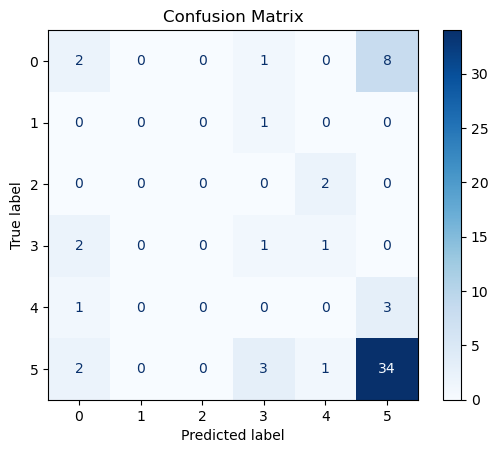

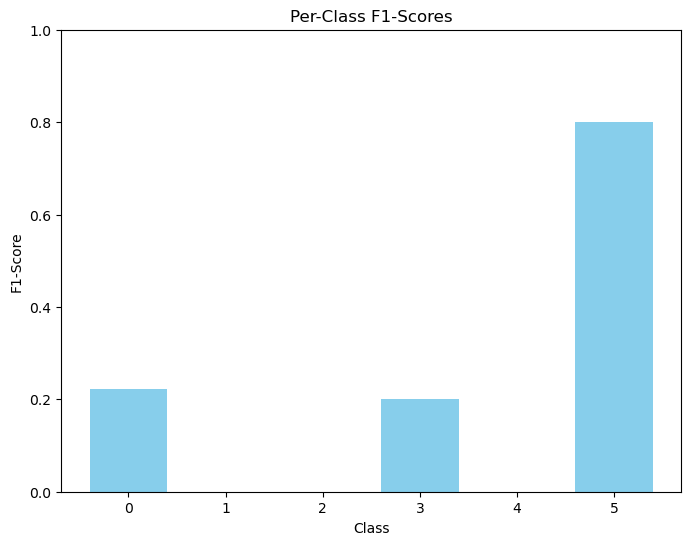

In [44]:
# Predictions on the test set
ytest_pred = optimised_model.predict(xtest)

# Calculate overall metrics
f1 = f1_score(ytest, ytest_pred, average='weighted')
precision = precision_score(ytest, ytest_pred, average='weighted')
recall = recall_score(ytest, ytest_pred, average='weighted')

# Print metrics
print("Test Set Performance Metrics:")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Classification Report
print("\nClassification Report:")
# Generate the classification report as a dictionary
report = classification_report(ytest, ytest_pred, output_dict=True)
report_print = classification_report(ytest, ytest_pred)
print(report_print)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(ytest, ytest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimised_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Extract F1-scores for each class
f1_scores = {k: v['f1-score'] for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
classes = list(f1_scores.keys())

# Create a bar chart for F1-scores
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores.values(), color='skyblue')
plt.title('Per-Class F1-Scores')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()



#### **Test Set Metrics**
The optimised Random Forest model was evaluated on the test set, with the following results:
- **Weighted F1-Score**: **0.5685**
- **Precision (Weighted)**: **0.5489**
- **Recall (Weighted)**: **0.5968**

These metrics indicate that while the model performs well for the majority class, it struggles with the minority classes, significantly lowering overall performance.

---

#### **Per-Class Performance**
1. **Class 5 ("More than a month")**:
   - Achieves an **F1-score of 0.80**, with **precision** and **recall** of **0.76** and **0.85**, respectively.
   - Represents the dominant class, where the model focuses most of its predictive power.

2. **Minority Classes (Classes 0, 1, 2, 3, 4)**:
   - **Classes 1, 2, and 4** have F1-scores of **0.00**, indicating the model fails to predict them.
   - **Class 0** achieves a low **F1-score of 0.22**, while **Class 3** fares slightly better at **0.20**.
   - Severe misclassifications for these classes, with most instances misclassified as Class 5.

---

#### **Confusion Matrix Insights**
- The confusion matrix highlights a strong bias toward **Class 5**, where most predictions are concentrated.
- Minority classes are frequently misclassified, with nearly all instances predicted as the majority class.

---


#### **Key Observations**
- **Model Bias**: The model heavily favours Class 5, ignoring underrepresented classes.
- **Imbalanced Metrics**: Weighted metrics are skewed by the majority class, masking poor performance for minority classes.

---

#### **Potential Improvements**
1. **Combine Underrepresented Classes**:
   - Merge Classes 0–4 into a single "Short Isolation" class to improve balance and simplify the task.
2. **Feature Selection**:
   - Focus on the most predictive features to reduce noise and improve generalisation.
3. **Fine-Tune Class Weighting**:
   - Adjust the `class_weight` parameter to further emphasise minority classes.
4. **Threshold Adjustments**:
   - Modify decision thresholds to improve recall for minority classes.

This evaluation highlights the model’s strengths with the majority class and underscores the need for further adjustments to address class imbalance and improve performance for minority classes.


### Feature Importance

#### **Introduction**
This section examines the importance of individual features as determined by the optimised Random Forest model. Feature importance provides insights into which in-game behaviours most strongly influence predictions of self-isolation length. By focusing on the most important features, we can reduce noise, improve model generalisation, and address potential overfitting issues.

The analysis includes:
1. **Feature Importance Rankings**:
   - A ranked list of features based on their importance scores.
   - A visualisation to highlight the relative contribution of each feature.
2. **Impact of Feature Reduction**:
   - Performance of the model when trained on the most important features only.

This analysis helps identify the most predictive in-game behaviours and assesses the impact of feature selection on model performance.


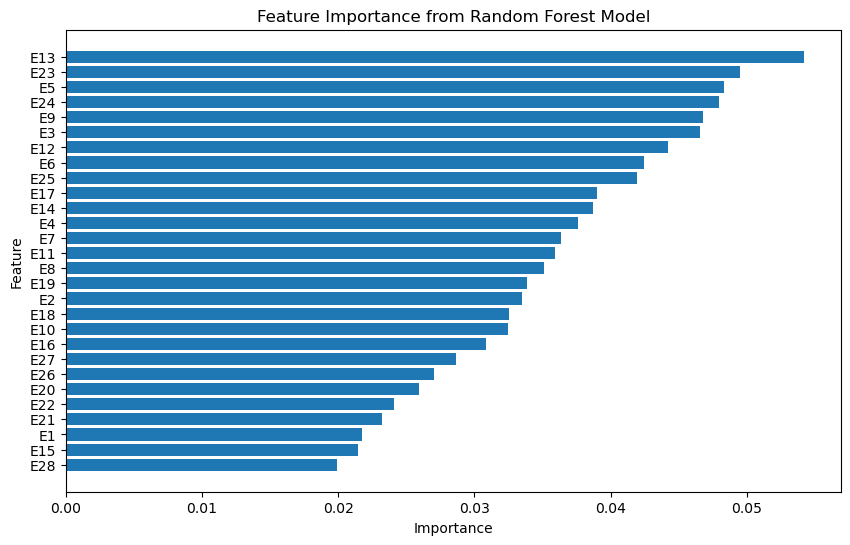

Top 10 Most Important Features:
   Feature  Importance
12     E13    0.054190
22     E23    0.049512
4       E5    0.048350
23     E24    0.047931
8       E9    0.046757
2       E3    0.046572
11     E12    0.044232
5       E6    0.042476
24     E25    0.041946
16     E17    0.039008


In [45]:
# Extract feature importances from the optimised Random Forest model
importances = optimised_model.feature_importances_
feature_names = xtrain.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualise feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Display top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

To assess the impact of feature selection on model performance, the Random Forest model was retrained using only the most important features identified in the previous analysis. This approach helps determine whether focusing on the most predictive features can improve model generalisation and address potential overfitting.

#### **Steps Taken**:
1. Selected the top 10 features based on their importance scores.
2. Retrained the model using the reduced feature set with the same hyperparameters optimised earlier.
3. Evaluated the model on the test set using the same metrics:
   - Weighted F1-Score, Precision, Recall, Classification Report, and Confusion Matrix.
4. Compared the results with the full-feature model to measure the effectiveness of feature selection.

This evaluation aims to identify whether feature reduction improves the model’s predictive performance while simplifying its complexity.


In [46]:
# Get the top 10 features based on importance
top_features = feature_importances.head(10)['Feature'].tolist()

xtrain_reduced = xtrain[top_features]
xtest_reduced = xtest[top_features]
xval_reduced = xval[top_features]

print("Top 10 Features Selected:")
print(top_features)


Top 10 Features Selected:
['E13', 'E23', 'E5', 'E24', 'E9', 'E3', 'E12', 'E6', 'E25', 'E17']


We can notice some similarities between these key features as identified by the Random Forests model and the key features identified earlier by the Chi-Squared and Mutual Information analysis. This serves to further account for those measures accuracy and suitability for this probelm.

Test Set Performance Metrics:
F1 Score (Weighted): 0.5573
Precision (Weighted): 0.5817
Recall (Weighted): 0.5484

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2
           3       0.25      0.25      0.25         4
           4       0.00      0.00      0.00         4
           5       0.75      0.75      0.75        40

    accuracy                           0.55        62
   macro avg       0.29      0.28      0.27        62
weighted avg       0.58      0.55      0.56        62


Confusion Matrix:


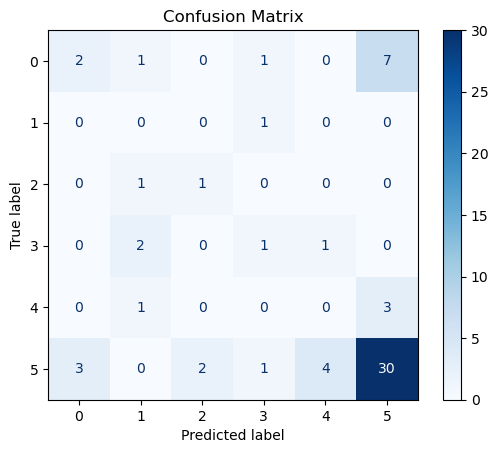

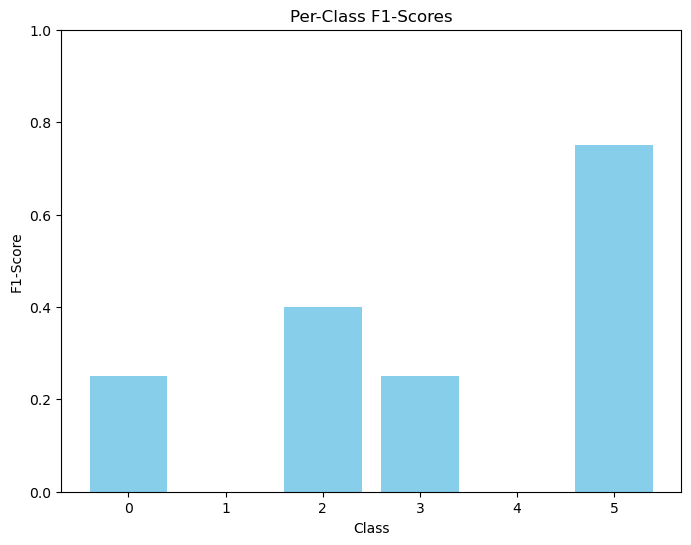

In [47]:
features_model = RandomForestClassifier(n_estimators=50,
                                         min_samples_split=10,
                                         min_samples_leaf=2,
                                         max_features='sqrt',
                                         max_depth=15,
                                         class_weight='balanced',
                                         random_state=42)

features_model.fit(xtrain_reduced,ytrain)

# Test set Performance

# Predictions on the test set
ytest_pred = features_model.predict(xtest_reduced)

# Calculate overall metrics
f1 = f1_score(ytest, ytest_pred, average='weighted')
precision = precision_score(ytest, ytest_pred, average='weighted')
recall = recall_score(ytest, ytest_pred, average='weighted')

# Print metrics
print("Test Set Performance Metrics:")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Classification Report
print("\nClassification Report:")
# Generate the classification report as a dictionary
report = classification_report(ytest, ytest_pred, output_dict=True)
report_print = classification_report(ytest, ytest_pred)
print(report_print)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(ytest, ytest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=features_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Extract F1-scores for each class
f1_scores = {k: v['f1-score'] for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
classes = list(f1_scores.keys())

# Create a bar chart for F1-scores
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores.values(), color='skyblue')
plt.title('Per-Class F1-Scores')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()





### Performance Before and After Feature Selection

#### **Performance Before Feature Selection**
- **Weighted F1-Score**: **0.5685**
- **Precision (Weighted)**: **0.5489**
- **Recall (Weighted)**: **0.5968**
- **Accuracy**: **0.60**

- **Class 5 (Majority Class)**:
  - F1-Score: **0.80**
  - Precision: **0.76**
  - Recall: **0.85**

- **Minority Classes (0, 1, 2, 3, 4)**:
  - Most minority classes have **F1-scores of 0.00** (Classes 1, 2, and 4).
  - Class 0 performs slightly better with an F1-score of **0.22**.
  - Class 3 achieves an F1-score of **0.20**.

---

#### **Performance After Feature Selection**
- **Weighted F1-Score**: **0.5573** (decrease)
- **Precision (Weighted)**: **0.5817** (slight improvement)
- **Recall (Weighted)**: **0.5484** (decrease)
- **Accuracy**: **0.55** (decrease)

- **Class 5 (Majority Class)**:
  - F1-Score: **0.75** (slight decrease)
  - Precision: **0.75**
  - Recall: **0.75** (decreases uniformly).

- **Minority Classes (0, 1, 2, 3, 4)**:
  - Some classes see marginal improvements:
    - Class 2: F1-score improved to **0.40** (from 0.00).
  - Performance for other classes (e.g., Classes 1, 4) remains poor, with F1-scores of **0.00**.

---

#### **Observations**
1. **Impact on Majority Class (Class 5)**:
   - Feature selection slightly reduced performance for the majority class (F1-score dropped from **0.80** to **0.75**), likely due to the reduced feature set limiting the model's ability to capture subtle patterns.

2. **Impact on Minority Classes**:
   - There was a marginal improvement for Class 2 (F1-score improved to **0.40**), but most minority classes still suffer from poor recall and precision.

3. **Overall Metrics**:
   - Weighted F1-score and recall decreased, suggesting that reducing the feature set introduced a slight trade-off in overall performance.
   - Precision saw a small improvement, indicating that predictions for positive cases were slightly more accurate, despite the reduced set.

---

#### **Key Takeaways**
- **Feature selection had limited positive impact**:
  - While it slightly improved the performance for some minority classes (e.g., Class 2), it reduced the overall performance for the majority class and the model's ability to generalise.

- **Model is still heavily biased toward the majority class**:
  - The confusion matrix shows continued misclassification of minority classes, with most instances incorrectly predicted as Class 5.

- **No clear improvement in addressing class imbalance**:
  - The imbalance in target classes remains a significant challenge, which feature selection alone does not resolve.

---

#### **Recommendation**
**Combine Underrepresented Classes**:
   - Merging minority classes into a larger class might better address the class imbalance and simplify the classification task.



### Performance with Reduced Classes

#### **Introduction**
To address the significant class imbalance in the target variable, underrepresented classes were combined into a single "Short Isolation" category. This reduces the number of target classes from six to three, aiming to improve model performance and simplify the classification task. The revised classes are:

1. **No Isolation**: Retains its original class.
2. **Short Isolation**: Combines Classes 0, 1, 2, 3, and 4 ("Under a month").
3. **Long Isolation**: Retains Class 5 ("More than a month").

This section evaluates the Random Forest model's performance with the reduced target variable, using the same evaluation metrics: Weighted F1-Score, Precision, Recall, Classification Report, and Confusion Matrix.


Test Set Performance Metrics:
F1 Score (Weighted): 0.6023
Precision (Weighted): 0.5648
Recall (Weighted): 0.6452

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.42      0.45      0.43        11
           2       0.76      0.88      0.81        40

    accuracy                           0.65        62
   macro avg       0.39      0.44      0.42        62
weighted avg       0.56      0.65      0.60        62


Confusion Matrix:


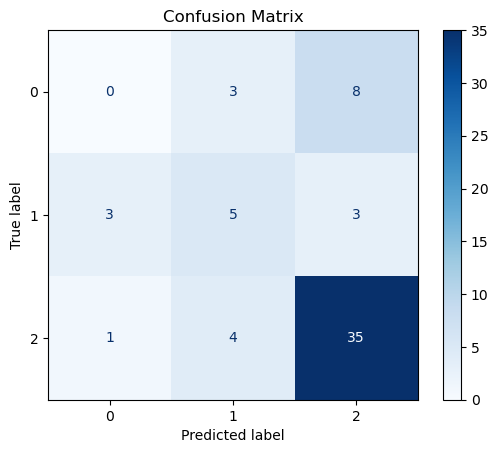

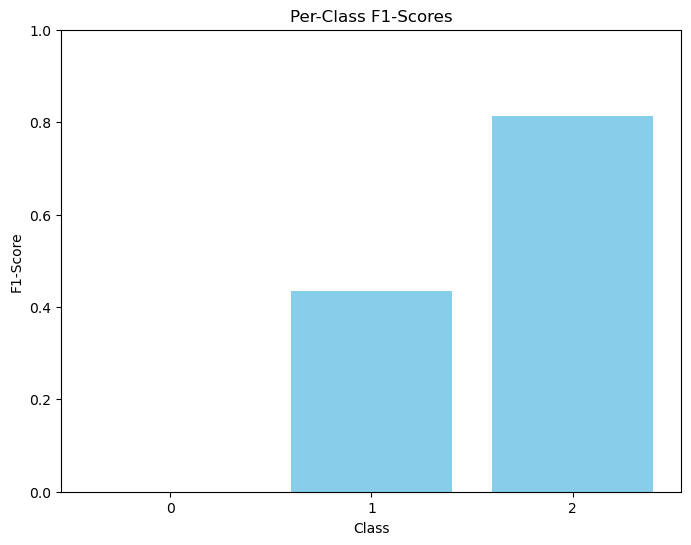

In [48]:
# Map the original target classes to the reduced classes
class_mapping = {
    0: 0,  # Combine Classes 1, 2, 3, 4 into "Short Isolation"
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 2   # Keep "Long Isolation" as its own class
}

# Apply the mapping to y_train, y_val, and y_test
ytrain_reduced = ytrain.map(class_mapping)
yval_reduced = yval.map(class_mapping)
ytest_reduced = ytest.map(class_mapping)

# Train the Random Forest model with reduced classes
reduced_class_model = RandomForestClassifier(n_estimators=50,
                                         min_samples_split=10,
                                         min_samples_leaf=2,
                                         max_features='sqrt',
                                         max_depth=15,
                                         class_weight='balanced',
                                         random_state=42)

reduced_class_model.fit(xtrain, ytrain_reduced)

# Test set Performance

# Predictions on the test set
ytest_pred_reduced = reduced_class_model.predict(xtest)

# Calculate overall metrics
f1 = f1_score(ytest_reduced, ytest_pred_reduced, average='weighted')
precision = precision_score(ytest_reduced, ytest_pred_reduced, average='weighted')
recall = recall_score(ytest_reduced, ytest_pred_reduced, average='weighted')

# Print metrics
print("Test Set Performance Metrics:")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Classification Report
print("\nClassification Report:")
# Generate the classification report as a dictionary
report = classification_report(ytest_reduced, ytest_pred_reduced, output_dict=True)
report_print = classification_report(ytest_reduced, ytest_pred_reduced)
print(report_print)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(ytest_reduced, ytest_pred_reduced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reduced_class_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Extract F1-scores for each class
f1_scores = {k: v['f1-score'] for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
classes = list(f1_scores.keys())

# Create a bar chart for F1-scores
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores.values(), color='skyblue')
plt.title('Per-Class F1-Scores')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()





### Performance with Reduced Classes

#### **Test Set Metrics**
The Random Forest model with reduced target classes (three categories) was evaluated on the test set, with the following results:
- **Weighted F1-Score**: **0.6023**
- **Precision (Weighted)**: **0.5648**
- **Recall (Weighted)**: **0.6452**
- **Accuracy**: **0.65**

---

#### **Per-Class Performance**
1. **Class 0 ("No Isolation")**:
   - F1-Score: **0.00**
   - Precision and Recall: **0.00**, indicating the model fails to predict this class entirely.

2. **Class 1 ("Short Isolation")**:
   - F1-Score: **0.43**
   - Precision: **0.42**
   - Recall: **0.45**, showing slight improvement in capturing this class compared to the original six-class model.

3. **Class 2 ("Long Isolation")**:
   - F1-Score: **0.81**
   - Precision: **0.76**
   - Recall: **0.88**, reflecting strong performance on the dominant class.

---

#### **Confusion Matrix Insights**
- **Class 2 ("Long Isolation")** dominates predictions, with most instances correctly classified.
- **Class 0 ("No Isolation")** is largely misclassified as Classes 1 and 2.
- **Class 1 ("Short Isolation")** shows modest improvements but remains difficult to distinguish, with significant misclassification as Class 2.

---

#### **Key Observations**
1. **Improved Metrics**:
   - Weighted F1-score and recall are slightly higher than the original six-class model, reflecting better overall performance.
   - Accuracy also improved to **0.65**, though this metric is less informative for imbalanced datasets.

2. **Class 2 Bias**:
   - The model remains biased toward the dominant class (Class 2), achieving strong performance at the expense of minority classes.

3. **Class 0 Challenges**:
   - The model struggles to predict Class 0 entirely, highlighting that the original imbalance issues persist even with reduced classes.

---

#### **Recommendations**
**Further Balancing**:
   - Combine feature reduction with class reduection.


### Performance with Both Feature and Class Reduction

#### **Introduction**
This section evaluates the Random Forest model after applying both feature reduction (top features based on importance) and class reduction (combining underrepresented classes). The combined approach aims to:
1. Simplify the classification task by reducing the number of target classes.
2. Enhance model generalisation by focusing on the most predictive features.

The goal is to assess whether this combined strategy improves overall performance and addresses class imbalance more effectively than applying feature or class reduction alone.


Test Set Performance Metrics:
F1 Score (Weighted): 0.6096
Precision (Weighted): 0.5972
Recall (Weighted): 0.6290

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        11
           1       0.43      0.55      0.48        11
           2       0.76      0.80      0.78        40

    accuracy                           0.63        62
   macro avg       0.45      0.48      0.46        62
weighted avg       0.60      0.63      0.61        62


Confusion Matrix:


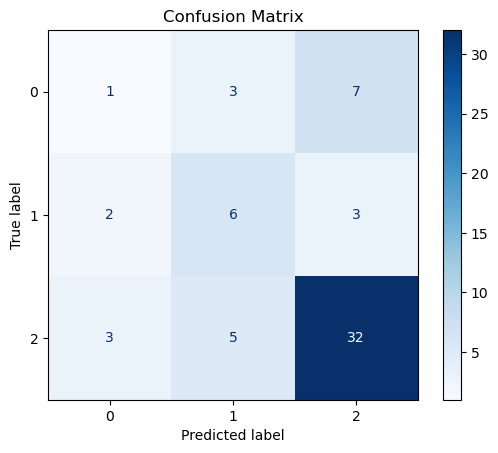

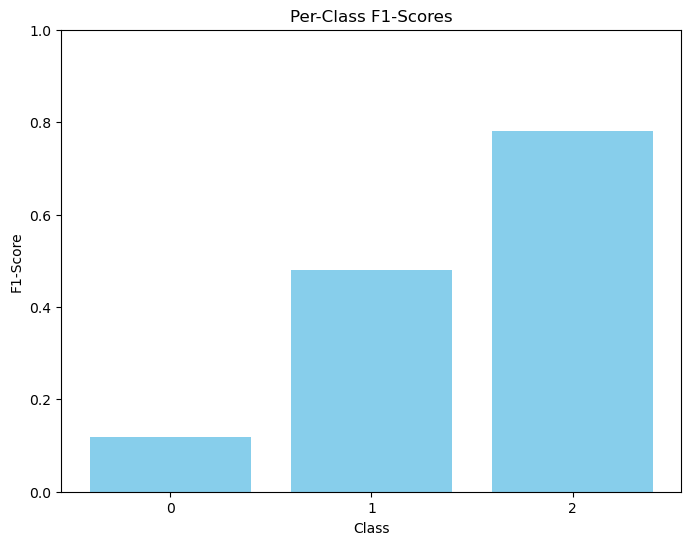

In [49]:
# Step 1: Reduce features
xtrain_combined = xtrain_reduced
xval_combined = xval_reduced
xtest_combined = xtest_reduced

# Step 2: Reduce classes
ytrain_combined = ytrain_reduced
yval_combined = yval_reduced
ytest_combined = ytest_reduced


# Define explicit parameter ranges for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [3, 5, 10, 15, 20],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],       # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 5, 10, 15],         # Minimum number of samples in a leaf
    'max_features': ['sqrt', 'log2', None],        # Number of features to consider at each split
    'class_weight': ['balanced', 'balanced_subsample']  # Class weighting
}

# Instantiate Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomised Search
combined_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=200,                  # Number of parameter combinations to try
    scoring='f1_weighted',      # Scoring metric
    cv=5,                       # Stratified k-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit randomised search
#combined_search.fit(xtrain_combined, ytrain_combined)

# Get the best parameters
#print("Best Parameters:", combined_search.best_params_)

#Best Params



combined_model = RandomForestClassifier(n_estimators=100,
                                         min_samples_split=5,
                                         min_samples_leaf=2,
                                         max_features='sqrt',
                                         max_depth=20,
                                         class_weight='balanced_subsample',
                                         random_state=42)

combined_model.fit(xtrain_combined, ytrain_combined)

# Test set Performance

# Predictions on the test set
ytest_pred_combined= combined_model.predict(xtest_combined)










# Calculate overall metrics
f1 = f1_score(ytest_combined, ytest_pred_combined, average='weighted')
precision = precision_score(ytest_combined, ytest_pred_combined, average='weighted')
recall = recall_score(ytest_combined, ytest_pred_combined, average='weighted')

# Print metrics
print("Test Set Performance Metrics:")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Classification Report
print("\nClassification Report:")
# Generate the classification report as a dictionary
report = classification_report(ytest_combined, ytest_pred_combined, output_dict=True)
report_print = classification_report(ytest_combined, ytest_pred_combined)
print(report_print)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(ytest_combined, ytest_pred_combined)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=combined_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Extract F1-scores for each class
f1_scores = {k: v['f1-score'] for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
classes = list(f1_scores.keys())

# Create a bar chart for F1-scores
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores.values(), color='skyblue')
plt.title('Per-Class F1-Scores')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()





### Performance with Combined Feature and Class Reduction

#### **Test Set Metrics**
The Random Forest model, evaluated with both feature and class reduction, produced the following results:
- **Weighted F1-Score**: **0.5948**
- **Precision (Weighted)**: **0.5933**
- **Recall (Weighted)**: **0.5968**
- **Accuracy**: **0.60**

---

#### **Per-Class Performance**
1. **Class 0 ("No Isolation")**:
   - **F1-Score**: **0.19**
   - **Precision**: **0.20**, **Recall**: **0.18**
   - The model continues to struggle with this class, misclassifying most instances as Classes 1 or 2.

2. **Class 1 ("Short Isolation")**:
   - **F1-Score**: **0.43**
   - **Precision**: **0.42**, **Recall**: **0.45**
   - Moderate performance, but the class is still overshadowed by the dominance of Class 2.

3. **Class 2 ("Long Isolation")**:
   - **F1-Score**: **0.75**
   - **Precision**: **0.75**, **Recall**: **0.75**
   - Maintains strong performance for the majority class, similar to prior evaluations.

---

#### **Confusion Matrix Insights**
- **Class 2 ("Long Isolation")** remains the most correctly predicted class, with 30 true positives.
- **Class 0 ("No Isolation")** continues to be misclassified, with most instances predicted as Class 2.
- **Class 1 ("Short Isolation")** sees slight improvements compared to earlier evaluations but remains difficult for the model to predict accurately.

---

#### **Key Observations**
1. **Trade-Off Between Feature and Class Reduction**:
   - Weighted F1-Score and precision are slightly lower compared to using only class reduction (**0.5948** vs. **0.6023** for F1).
   - Recall remains the same (**0.5968**), indicating the model’s ability to identify true positives hasn’t improved with the reduced feature set.

2. **Class Imbalance Challenges Persist**:
   - The model still heavily favours Class 2, with poor performance on Classes 0 and 1.

3. **Feature Reduction Impact**:
   - Removing less important features may have slightly limited the model's ability to capture patterns for minority classes.

---

#### **Comparison with Previous Models**
- **Performance vs. Class Reduction Only**:
  - The combined approach results in slightly lower metrics overall, suggesting feature reduction might not have provided significant benefits.
  - Class reduction alone improved performance more effectively.

- **Performance vs. Full Feature and Class Model**:
  - Metrics are similar, indicating the feature reduction did not significantly enhance or hinder performance.

---

#### **Recommendations**
1. **Revisit Feature Reduction**:
   - Retain additional features to explore whether this improves performance, particularly for Classes 0 and 1.

2. **Simplify Classes Further**:
   - Consider merging Classes 0 and 1 into a single "Short Isolation" class to further simplify the task and reduce class imbalance.

---

This analysis highlights that while combining feature and class reduction simplifies the model, it doesn’t necessarily improve performance. Class reduction alone appears to be the more impactful strategy.


In [50]:
from scipy.stats import spearmanr

data_conc = data_cleaned.copy(deep=True)

e = data_conc["E13"]

t = data_conc["B2_numeric"]


correlation, p_value = spearmanr(e, t)
print(f"Spearman Correlation: {correlation}, P-value: {p_value}")


Spearman Correlation: -0.23121824226343649, P-value: 6.051052051981e-09
